# Timeseries of different network states

This notebook draws the time series in Fig. 2 b for different locations in the bifurcation diagrams.

In [1]:
# change into the root directory of the project
import os
if os.getcwd().split("/")[-1] == "notebooks":
    os.chdir('..')

In [2]:
import logging
logger = logging.getLogger()
#import warnings
#warnings.filterwarnings("ignore")

logger.setLevel(logging.INFO)
#logging.disable(logging.WARNING)
#logging.disable(logging.WARN)

%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
plt.rcParams['image.cmap'] = 'plasma'

from neurolib.models.aln import ALNModel
from neurolib.utils.parameterSpace import ParameterSpace
from neurolib.optimize.exploration import BoxSearch
import neurolib.utils.functions as func
import neurolib.utils.paths as paths

import neurolib.utils.devutils as du

import neurolib.utils.brainplot as bp

import neurolib.optimize.exploration.explorationUtils as eu

from neurolib.utils.loadData import Dataset

In [4]:
#plt.style.use("paper")
plt.style.reload_library()
plt.rcParams['svg.fonttype'] = 'none'

In [5]:
def set_axis_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

In [6]:
ds = Dataset("gw", fcd=True)
model = ALNModel(Cmat = ds.Cmat, Dmat = ds.Dmat)
model.params['dt'] = 0.1
model.params['duration'] = 10 * 1000 #ms

INFO:root:Loading dataset gw_big from /Users/caglar/Documents/PhD/projects/neurolib/neurolib/utils/../data/datasets/gw_big.
INFO:root:Computing FCD matrices ...
INFO:root:Dataset gw_big loaded.
INFO:root:aln: Model initialized.


In [7]:
# parameters of the bifurcation diagrams
model.params["tauA"] = 600.0
model.params["Ke_gl"] = 300.00

# No adaptation

In [8]:
model.params["sigma_ou"] = 0.2
model.params["b"] = 0.0

In [11]:
model.randomICs()
model.params['mue_ext_mean'] = 2.3
model.params['mui_ext_mean'] = 2.8

model.params['duration'] = 3 * 1000 #ms
#model.run()
rect_stimulus = func.construct_stimulus(stim="rect", duration=model.params.duration, dt=model.params.dt)
model.params['ext_exc_current'] = rect_stimulus * 5.0

model.run()

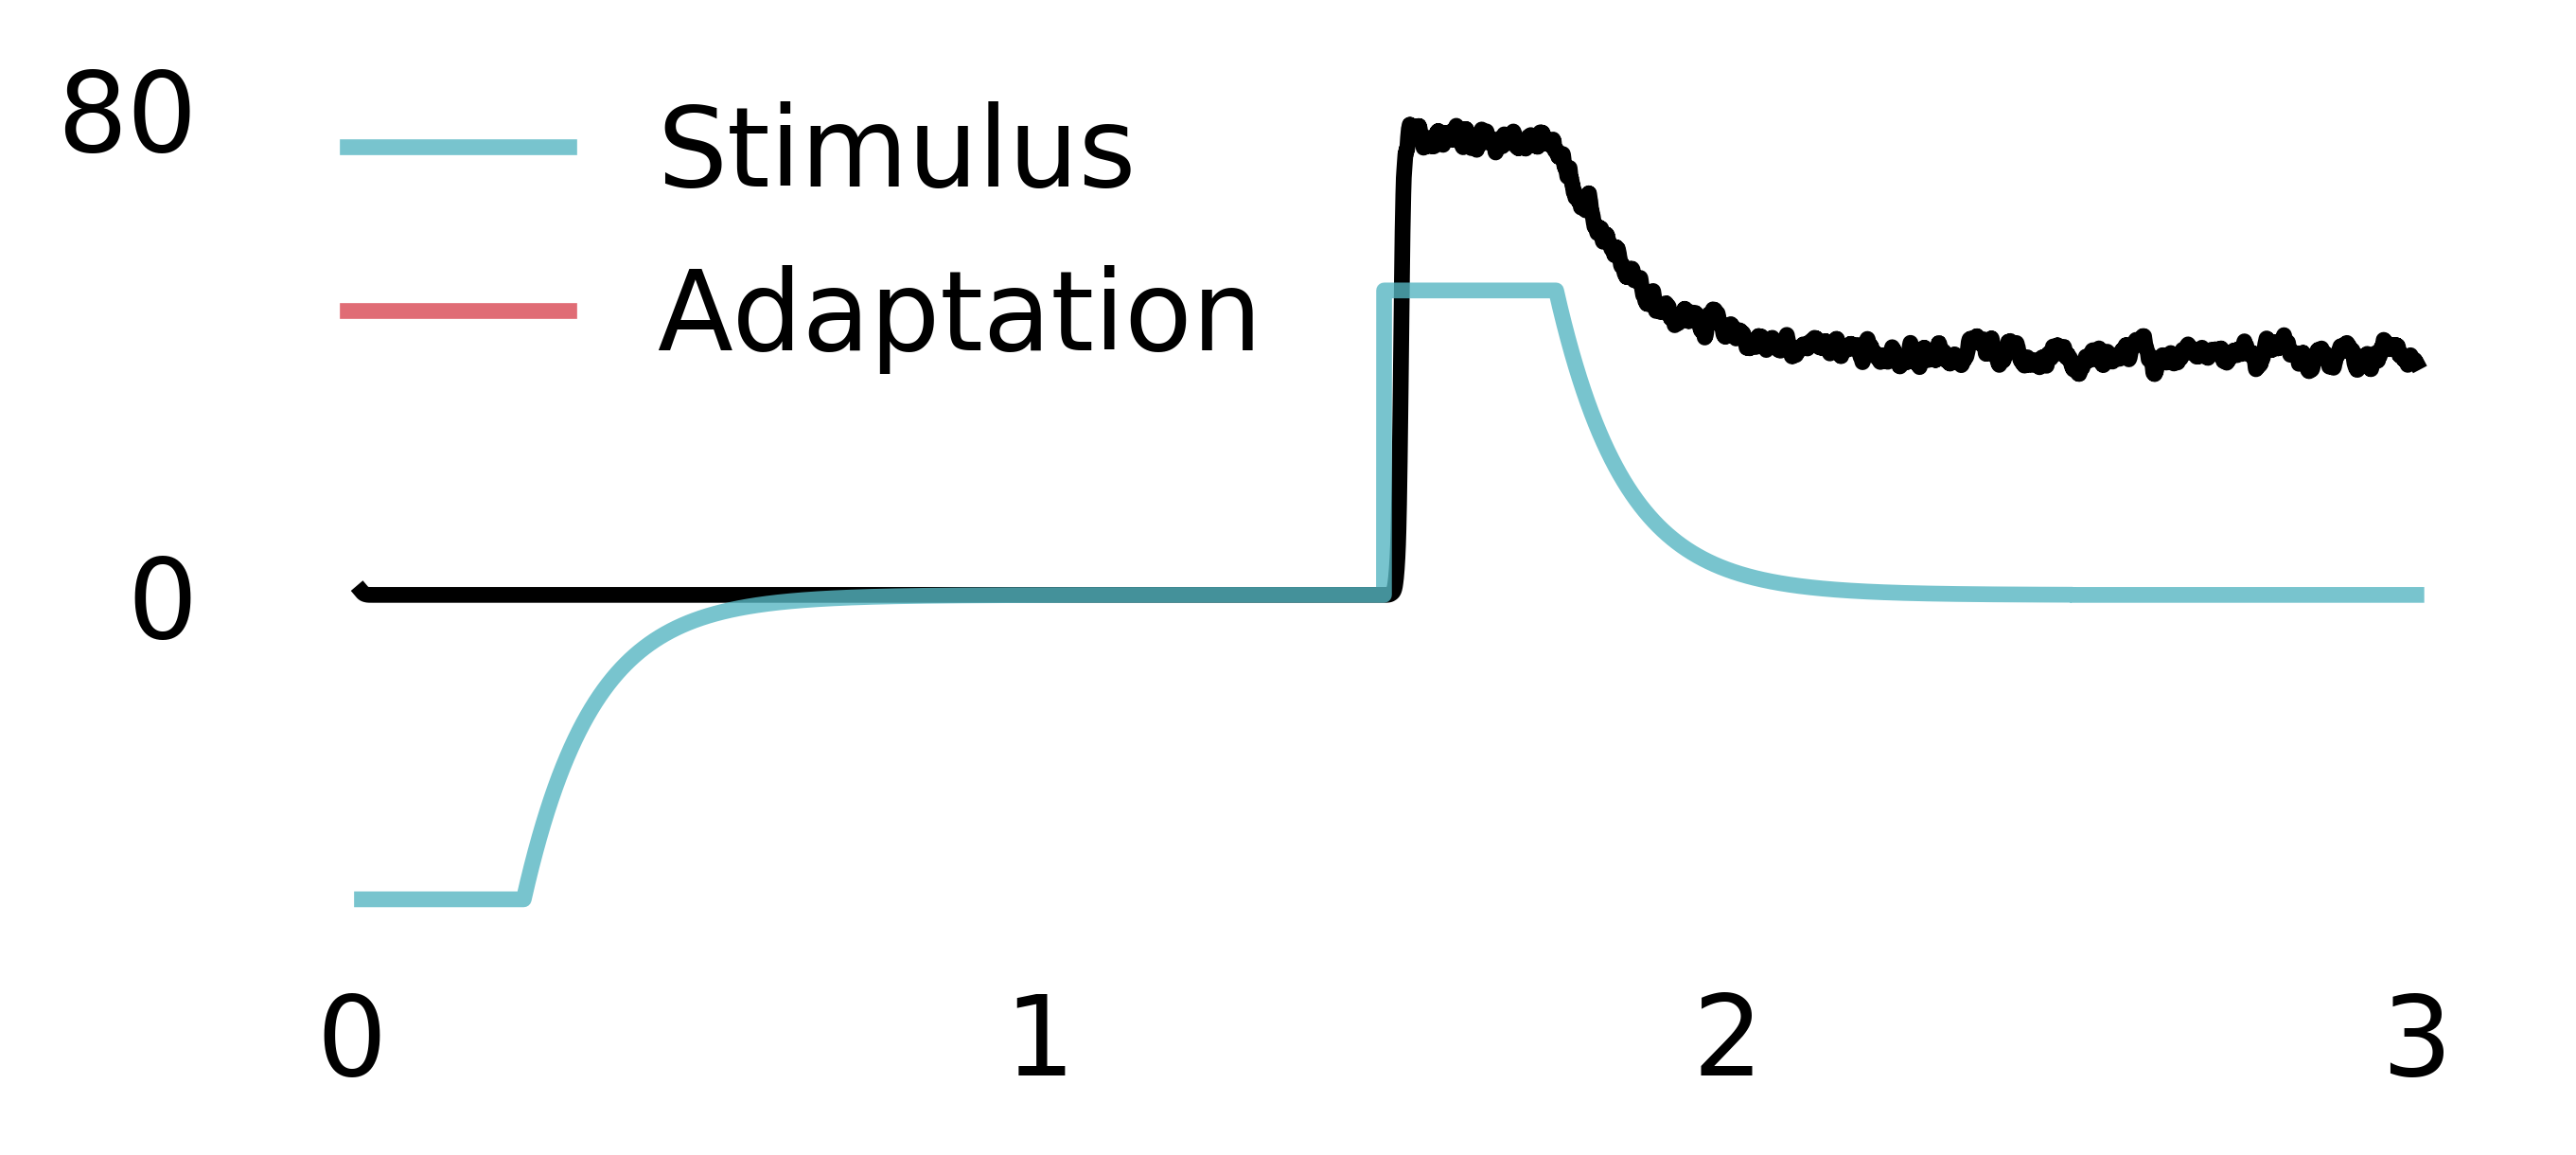

In [12]:
bp.plot_ts(model, stimulus=True, adaptation=True, plot_nodes="mean", stimulus_scale = 50, lw=2, xlim = (150, 30000), savename='bistability_mean.pdf')

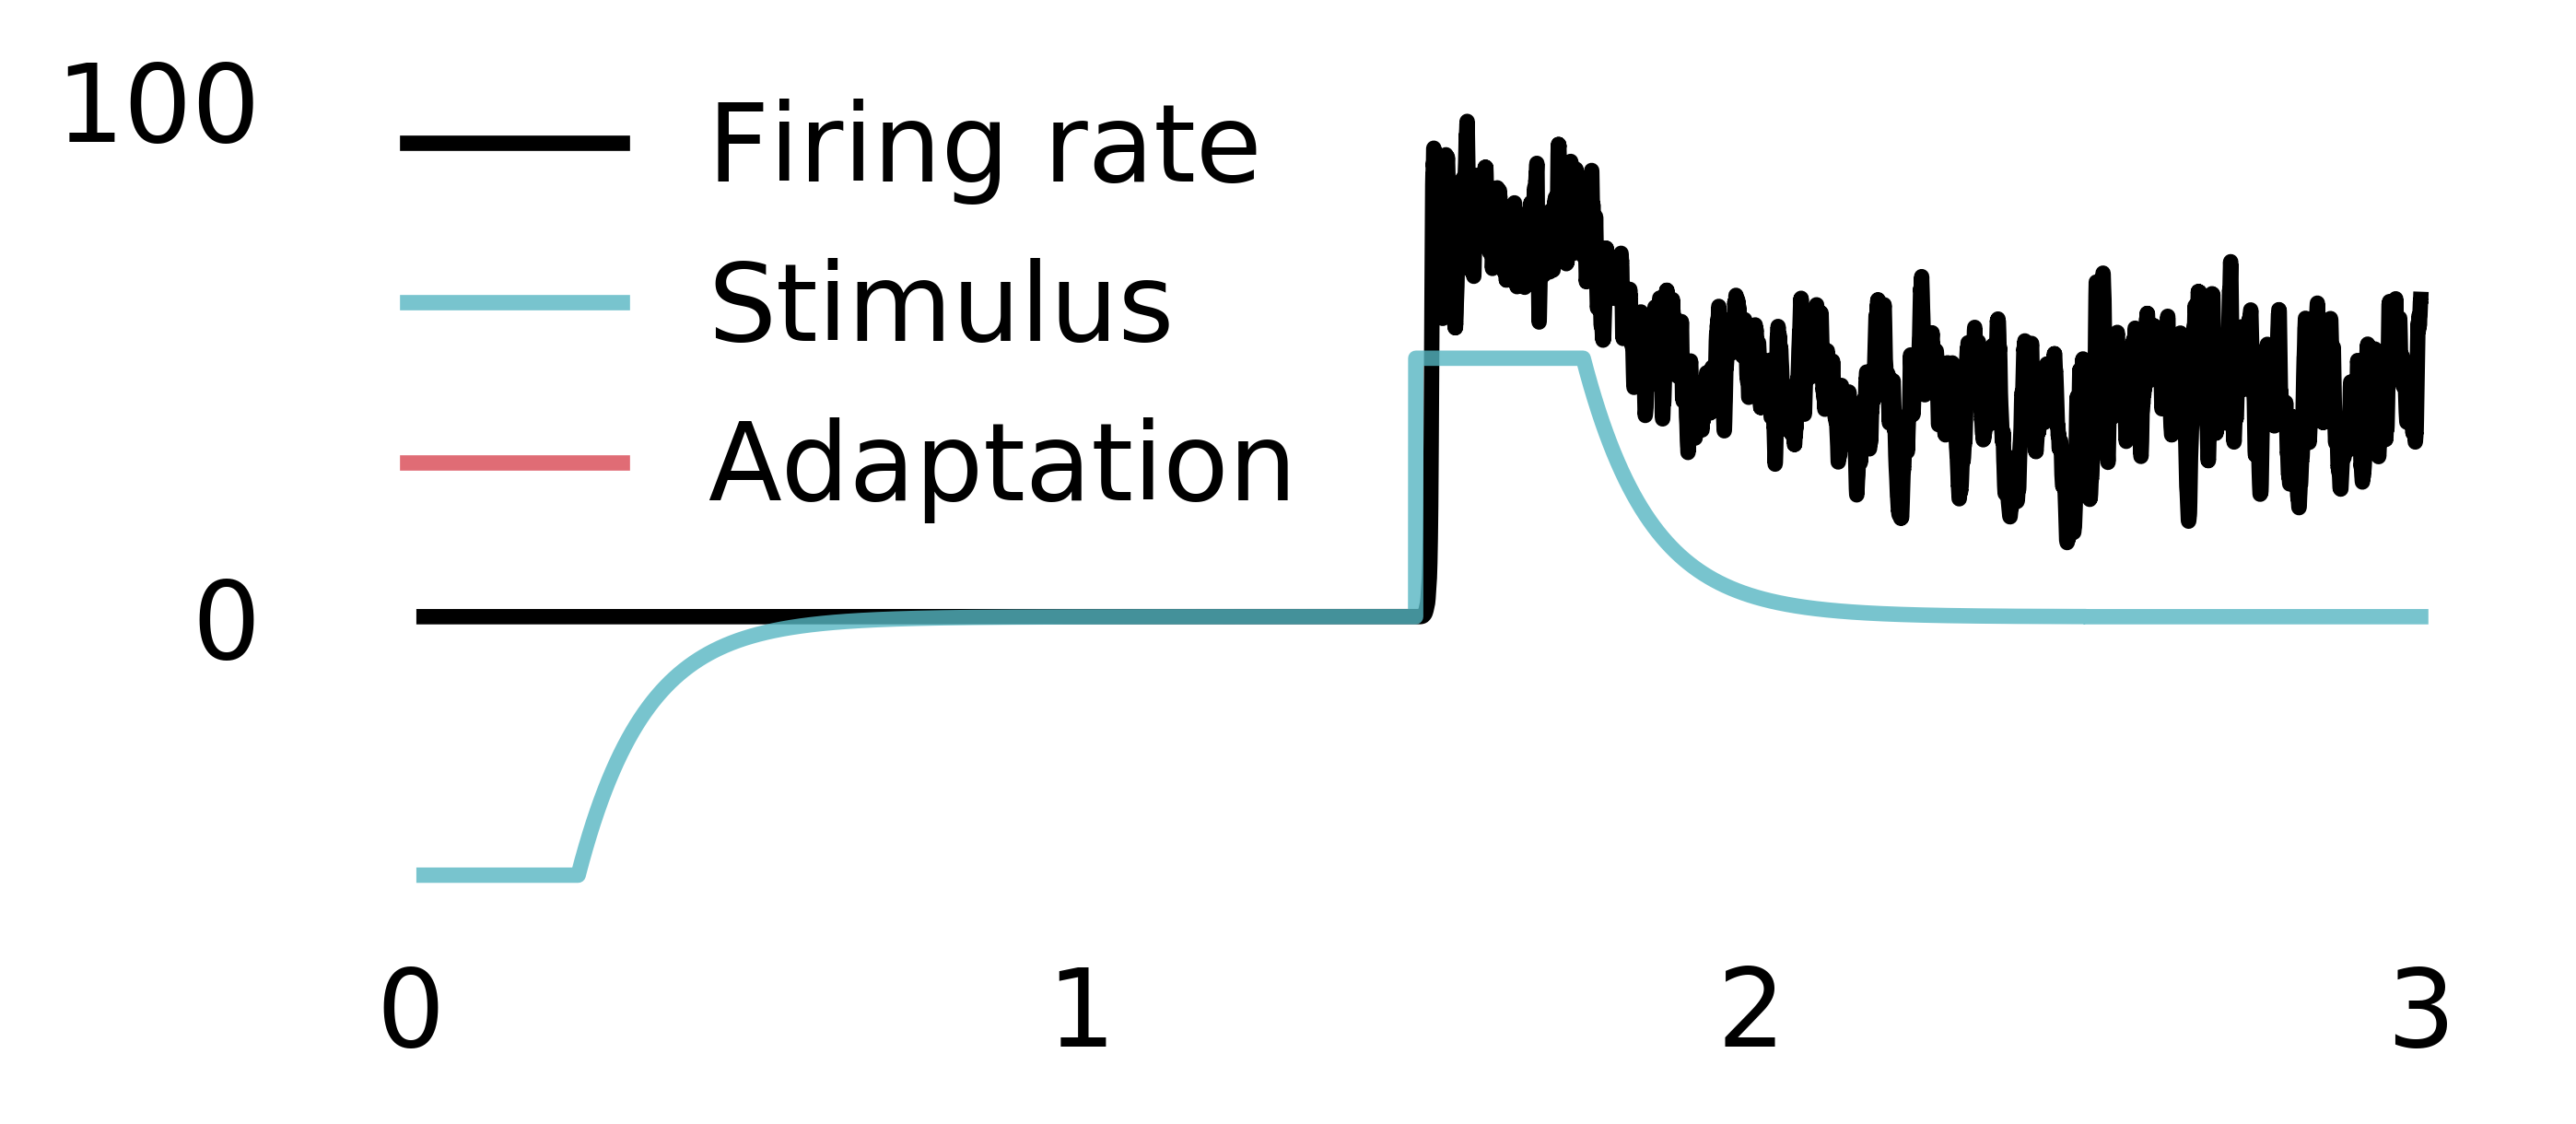

In [14]:
bp.plot_ts(model, adaptation=True, stimulus=True, stimulus_scale = 50, lw=2, xlim = (200, 30000), savename='bistability.pdf')

In [48]:
model = ALNModel(Cmat = ds.Cmat, Dmat = ds.Dmat)
model.params['dt'] = 0.1
model.params['duration'] = 10 * 1000 #ms
model.params["tauA"] = 600.0
model.params["Ke_gl"] = 300.00

INFO:root:aln: Model initialized.


In [49]:
model.params["sigma_ou"] = 0.1
model.params["b"] = 0.0

In [52]:
model.params["sigma_ou"] = 0.1
model.params["b"] = 0.0
model.params['mue_ext_mean'] = 0.3
model.params['mui_ext_mean'] = 0.5
model.run(chunkwise=True, chunksize=50000)

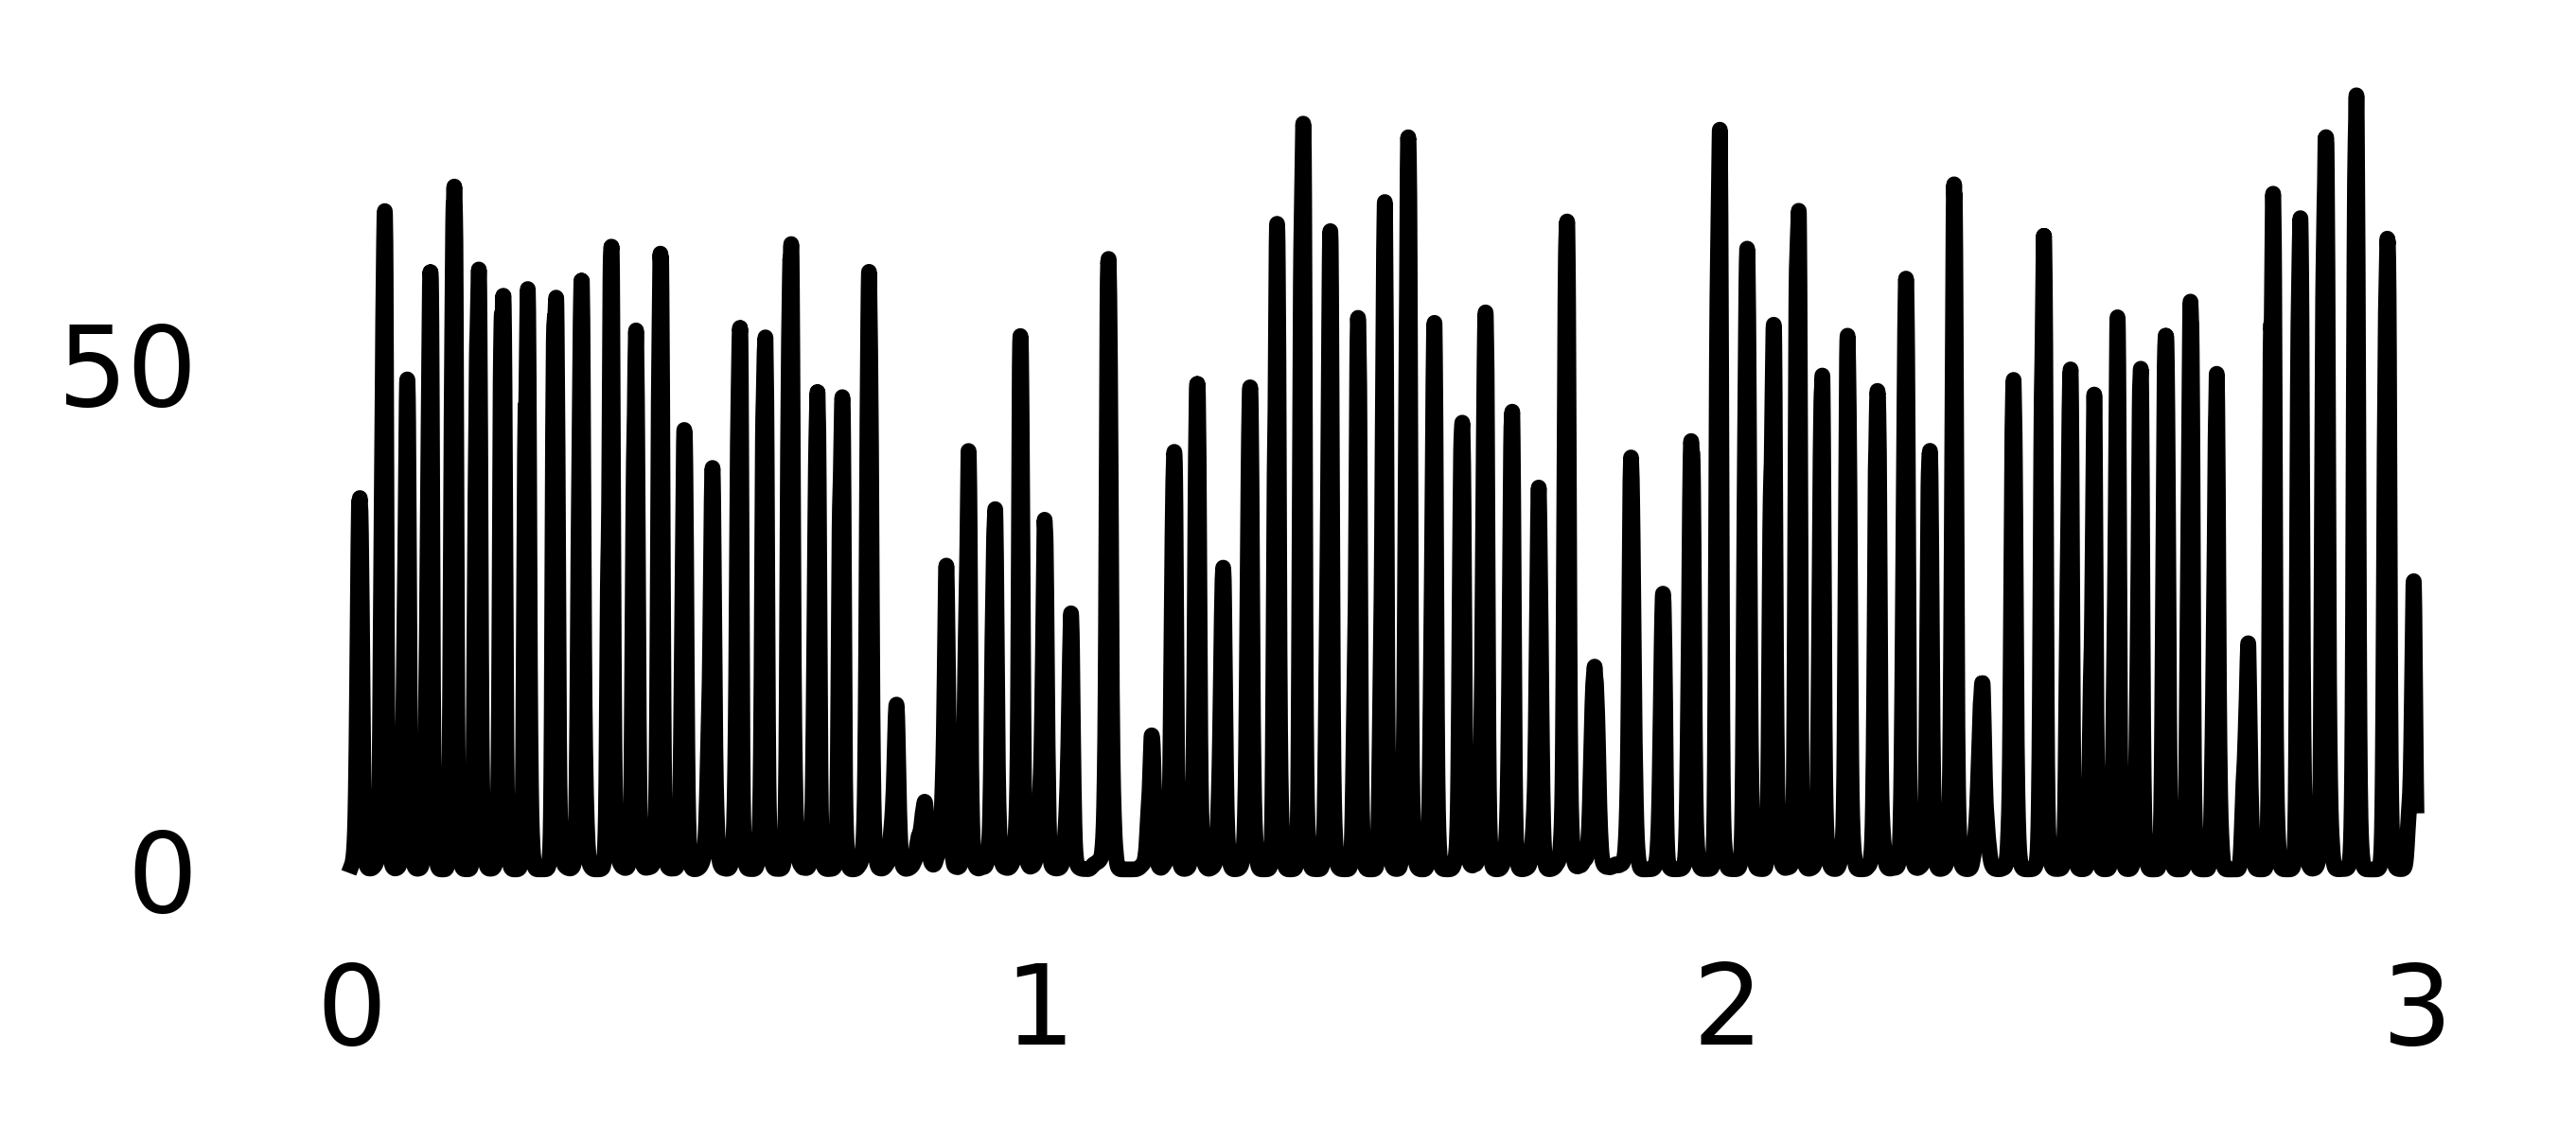

In [53]:
bp.plot_ts(model, xlim=(00000, 30000), lw=2)

In [ ]:
model.params["sigma_ou"] = 0.2
model.params["b"] = 0.0
model.params['mue_ext_mean'] = 0.2
model.params['mui_ext_mean'] = 0.5
model.run(chunkwise=True, chunksize=50000)

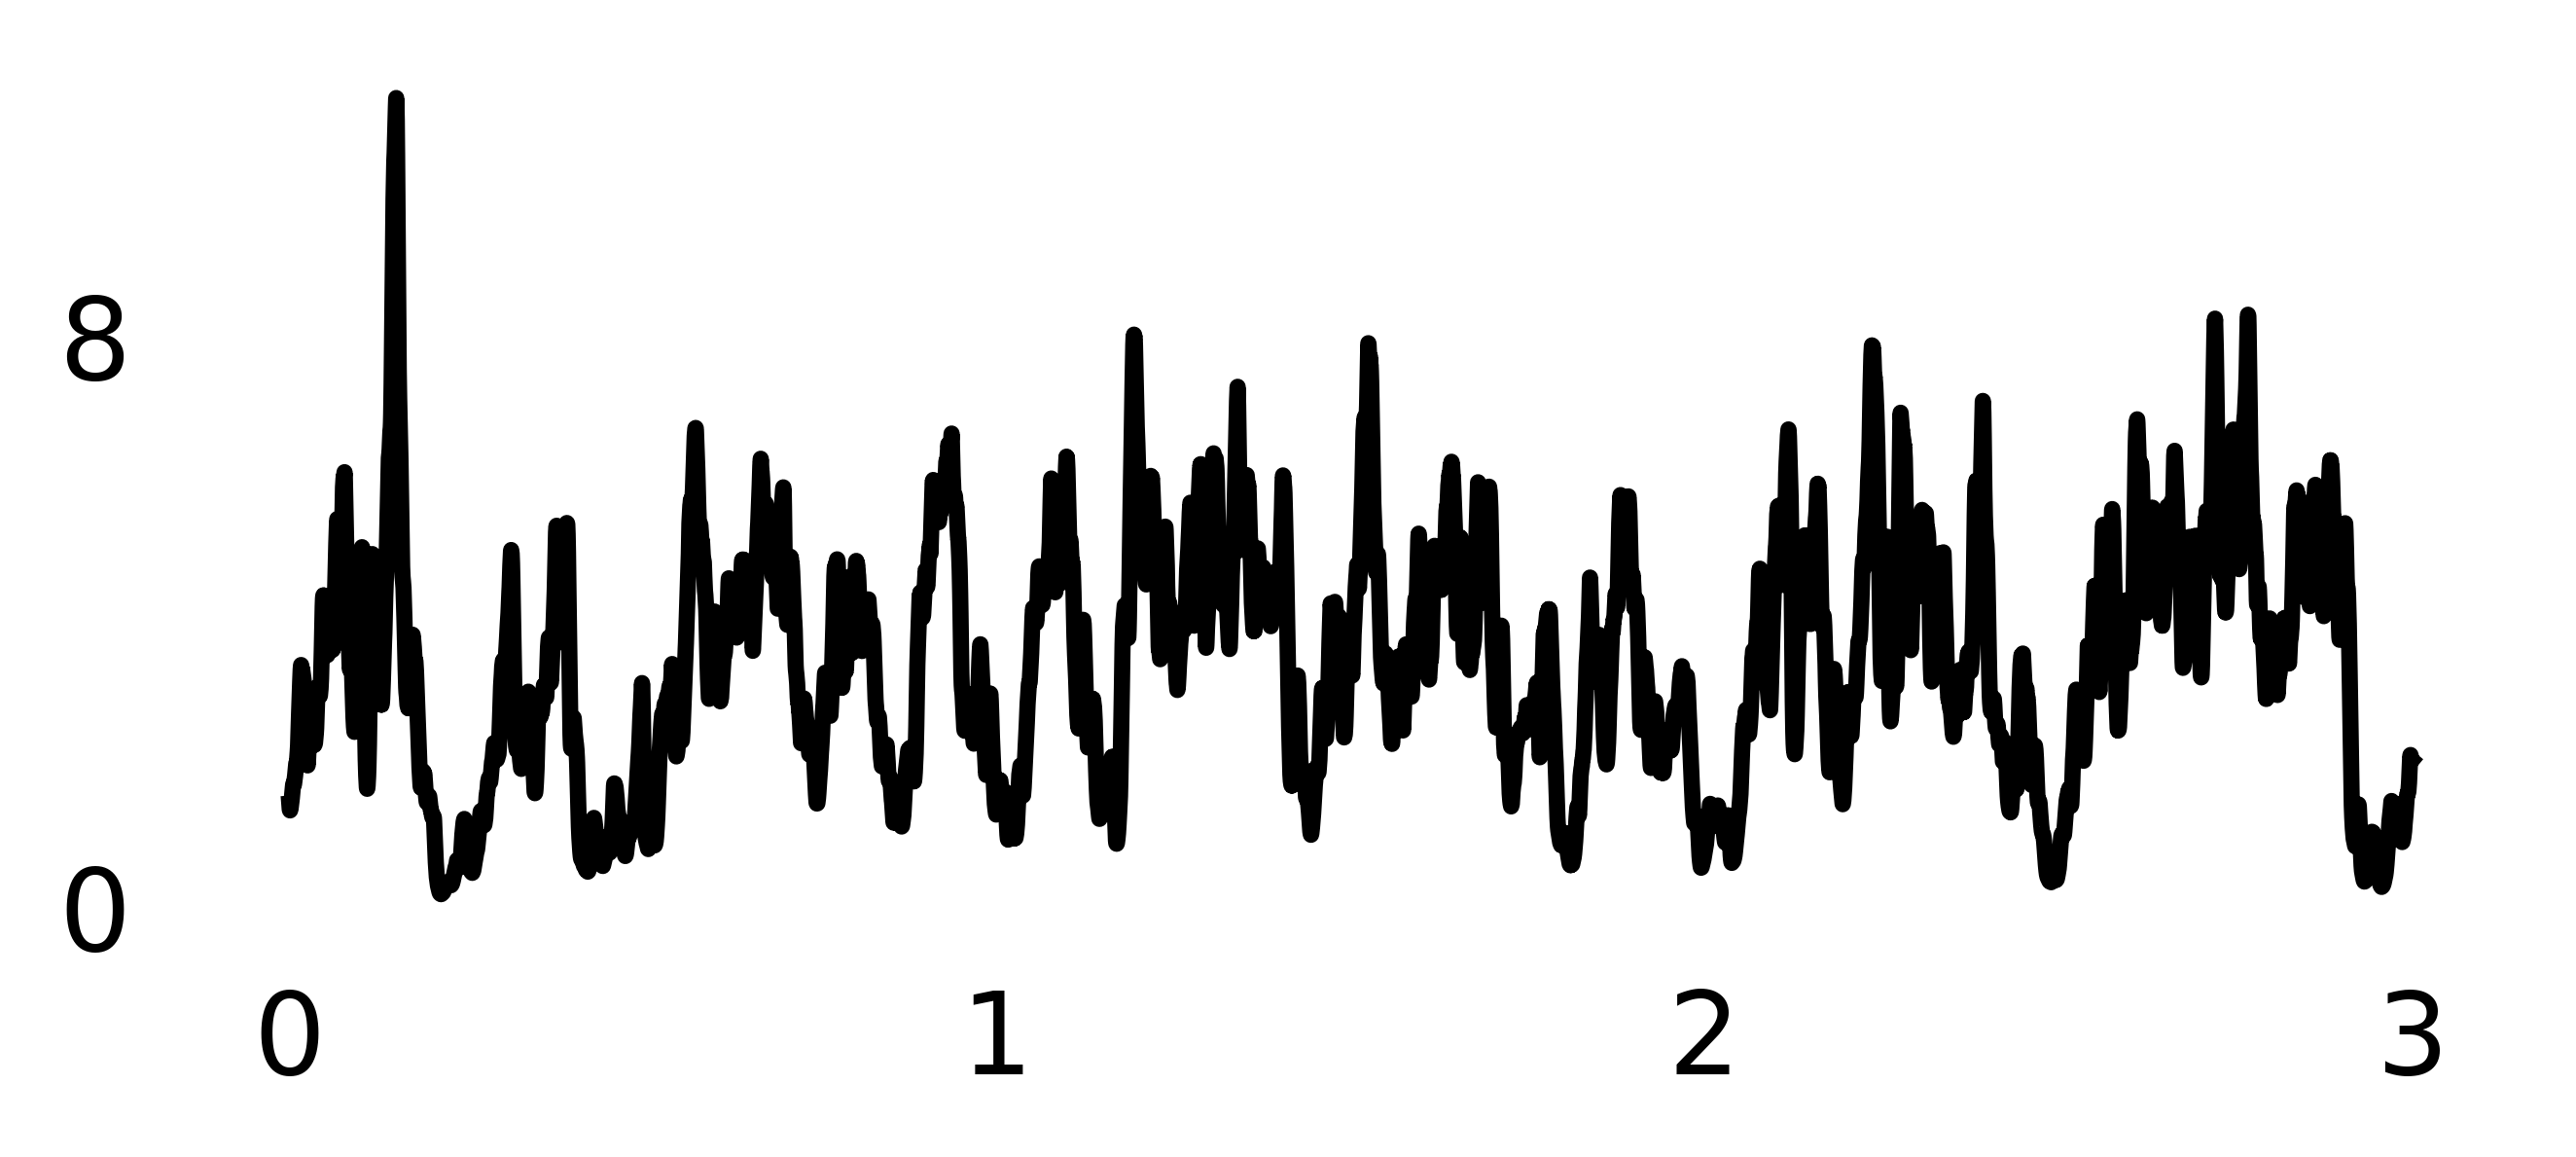

In [36]:
bp.plot_ts(model, xlim=(00000, 30000), plot_nodes="mean", lw=2, savename='LC_ei_mean.pdf')

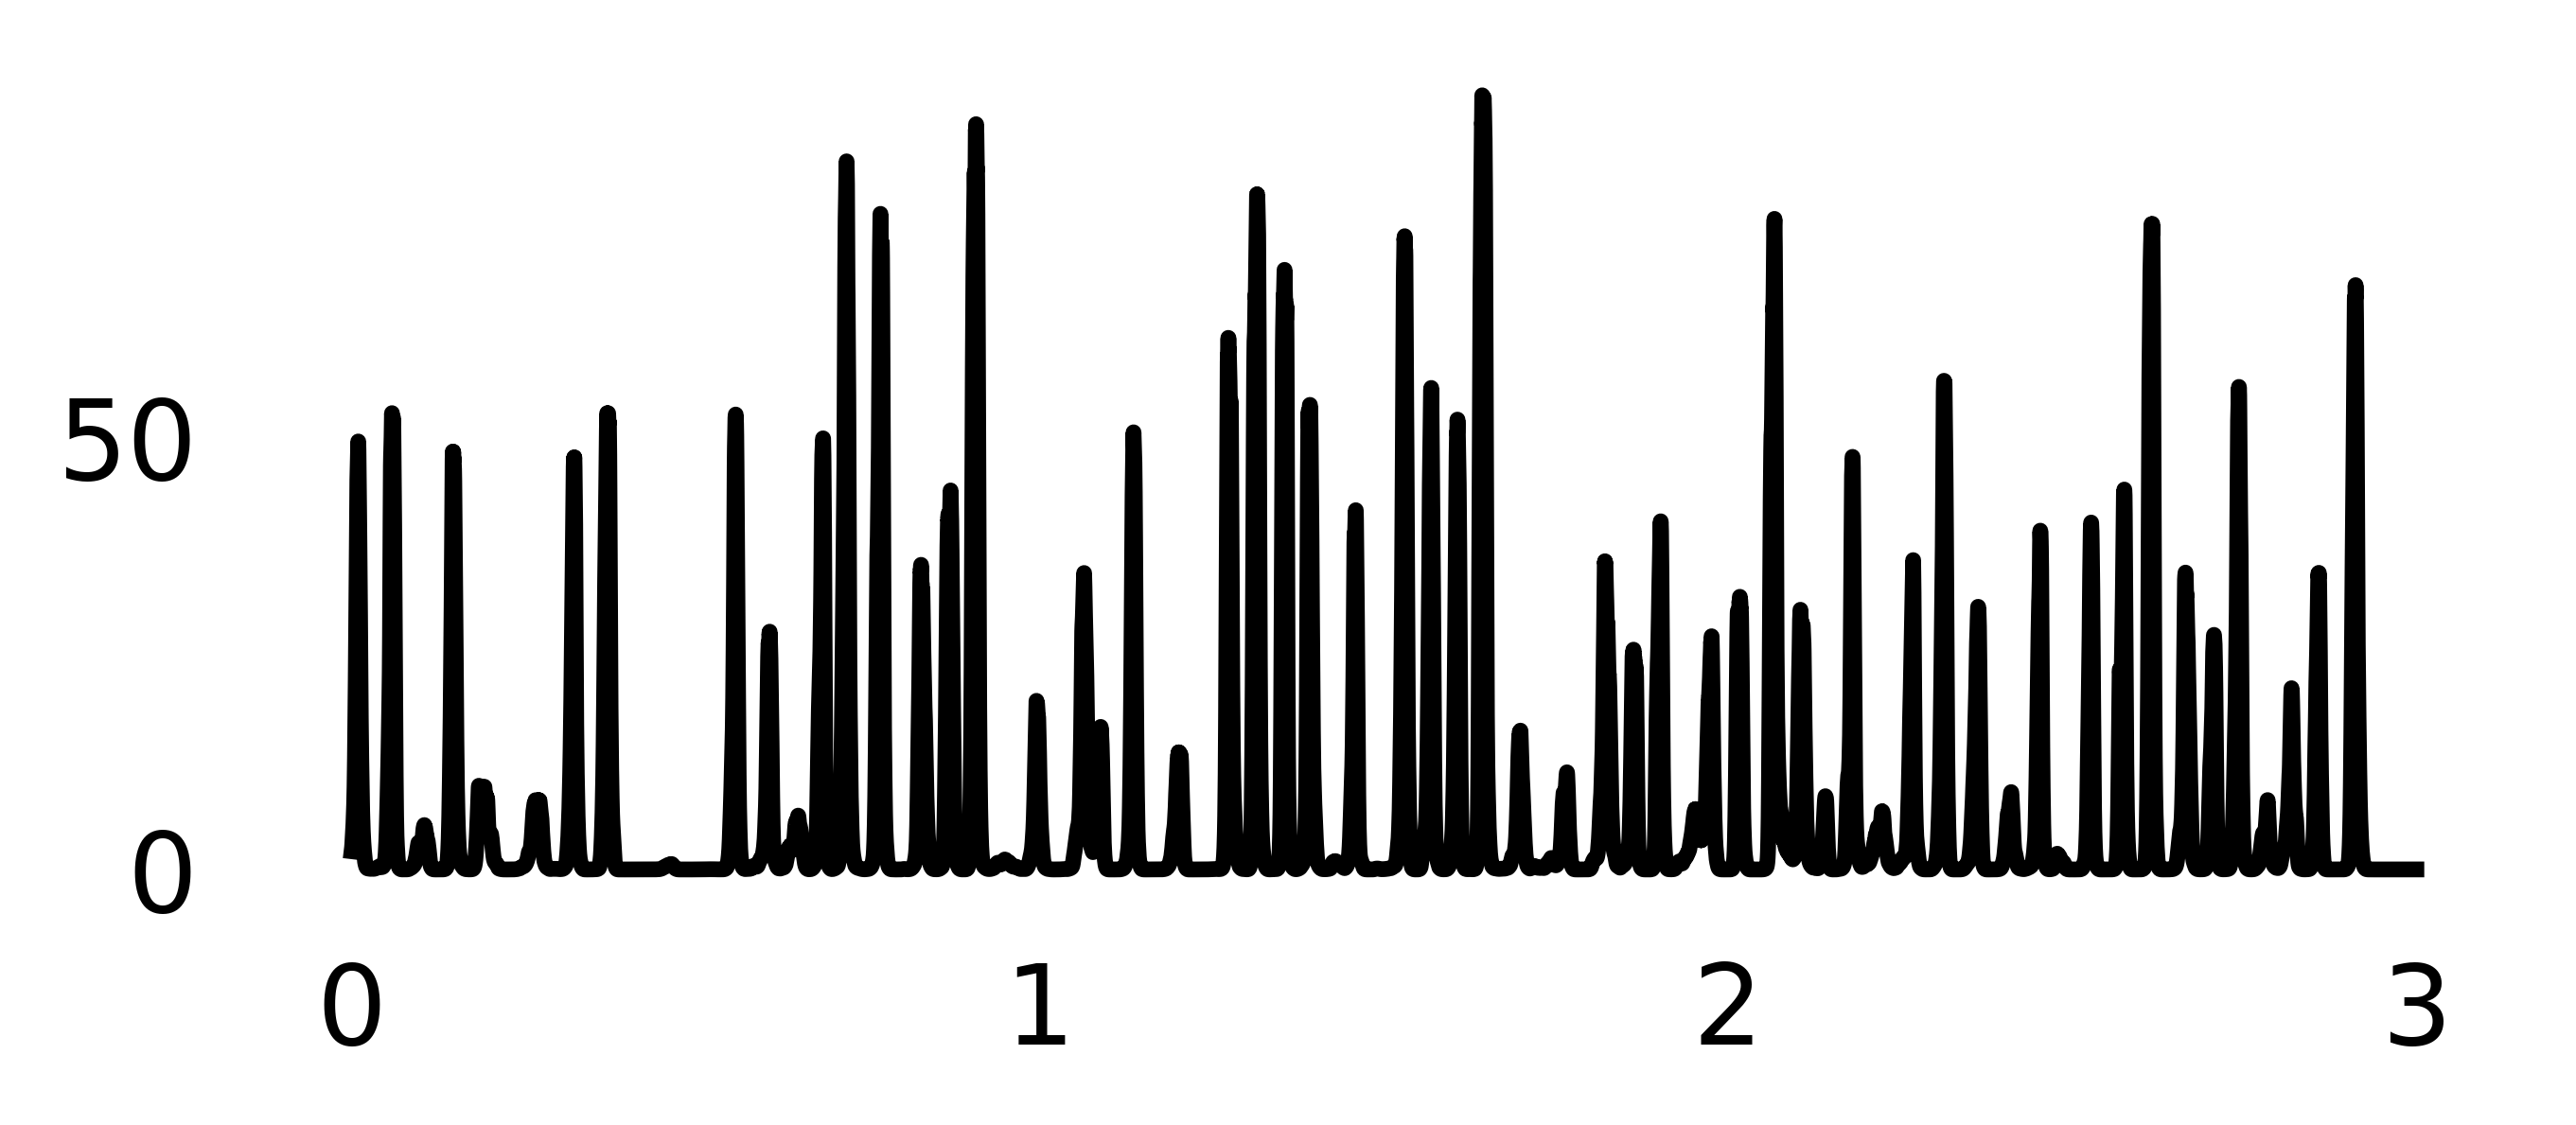

In [37]:
bp.plot_ts(model, xlim=(00000, 30000), savename='LC_ei.pdf', lw=2)

# With adaptation

In [15]:
model = ALNModel(Cmat = ds.Cmat, Dmat = ds.Dmat)
model.params['dt'] = 0.1
model.params['duration'] = 10 * 1000 #ms
model.params["tauA"] = 600.0
model.params["Ke_gl"] = 300.00
model.params["signalV"] = 80.00

INFO:root:aln: Model initialized.


In [46]:
model.params["sigma_ou"] = 0.1
model.params["b"] = 20.0
model.randomICs()
model.params['mue_ext_mean'] = 0.5
model.params['mui_ext_mean'] = 0.5
model.run(chunkwise=True, chunksize=50000)

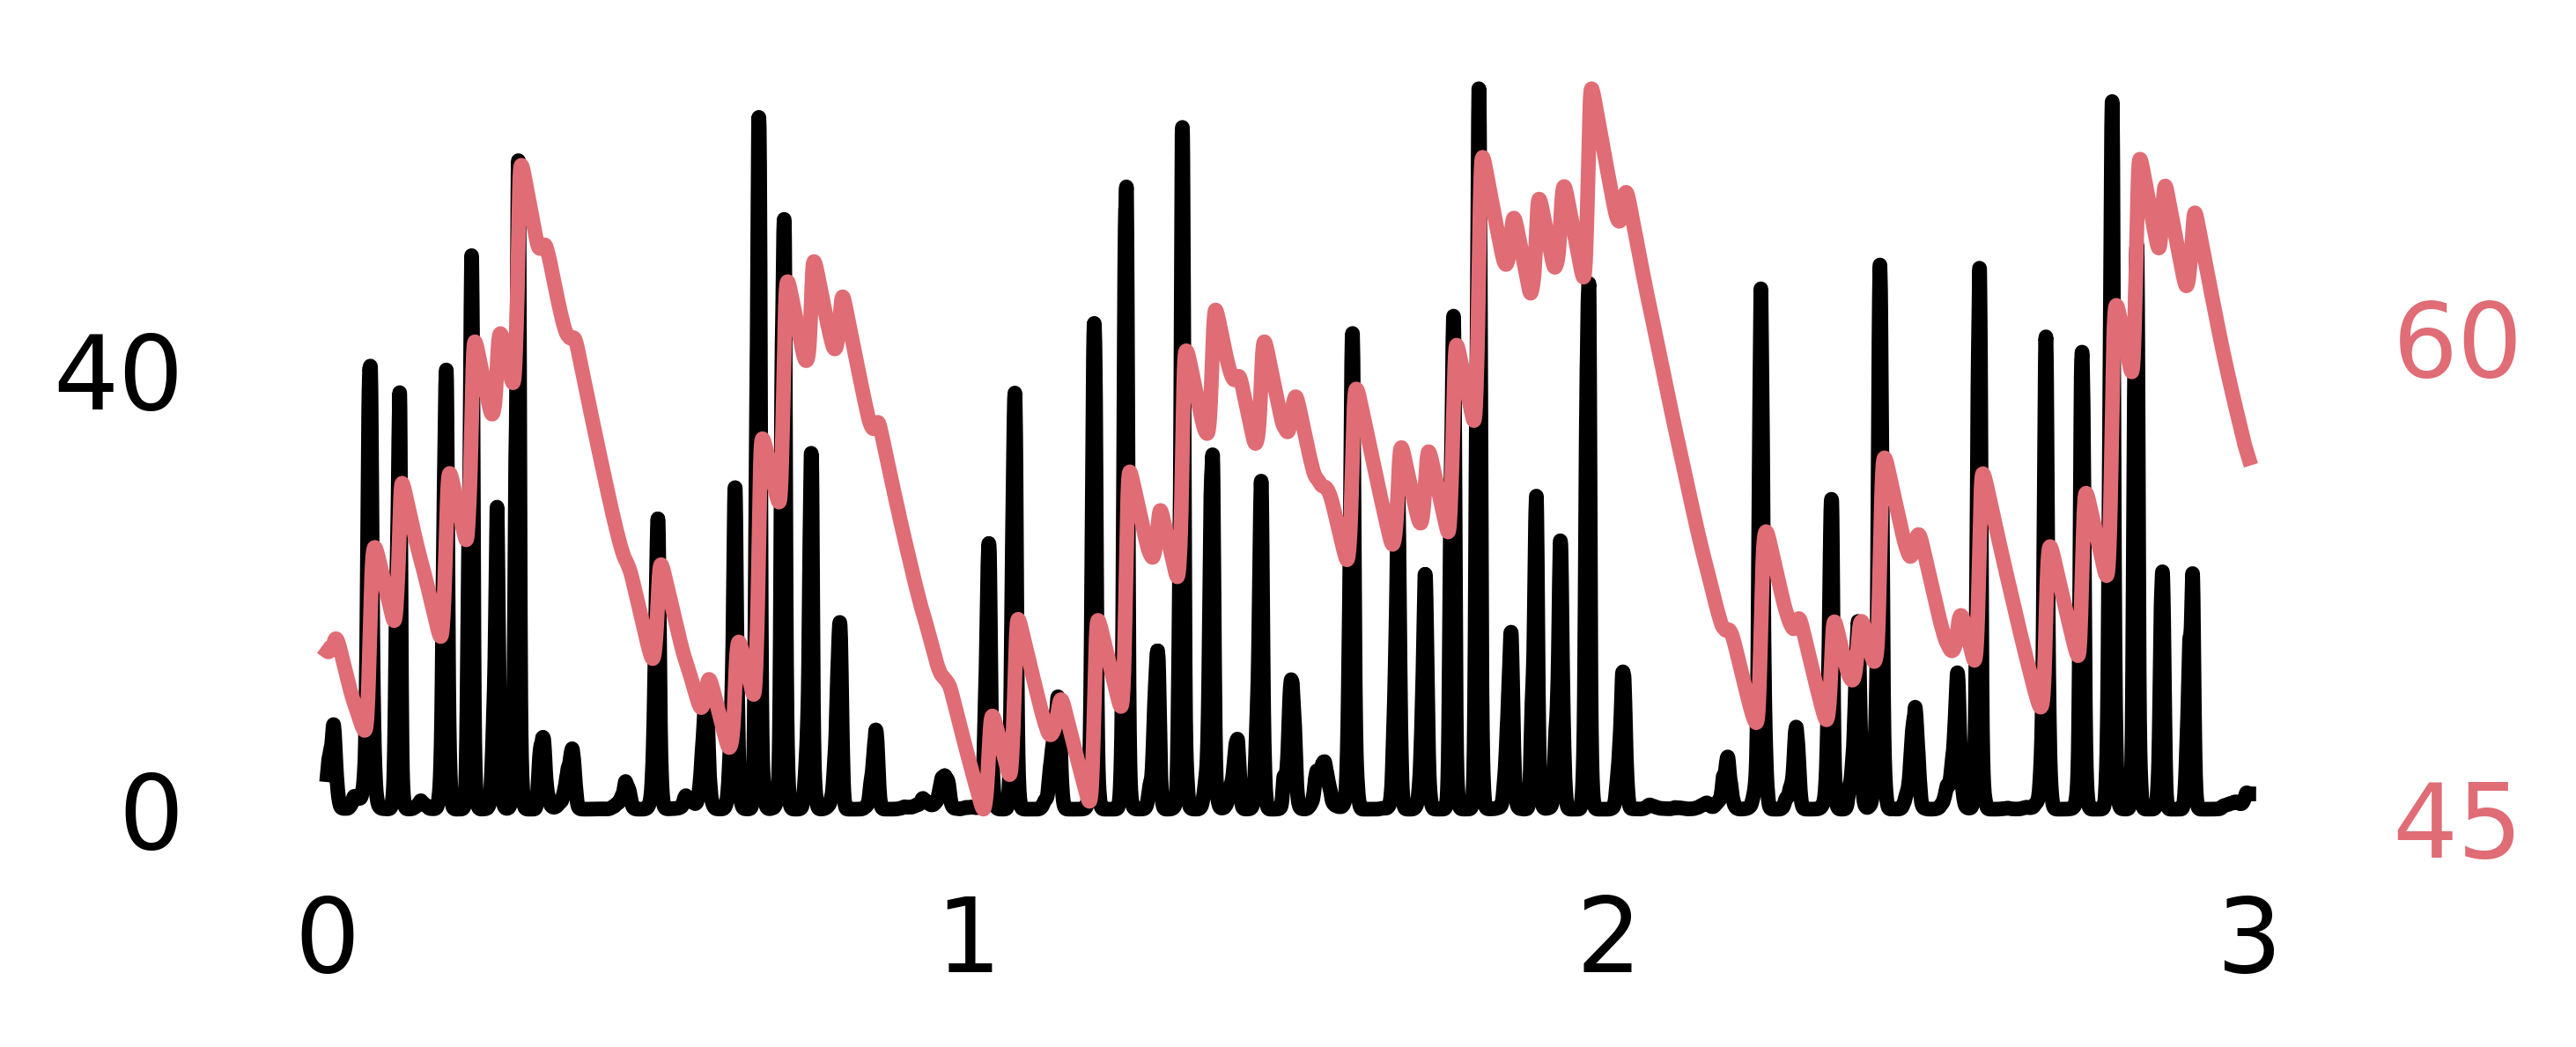

In [47]:
bp.plot_ts(model, xlim=(00000, 30000), adaptation=True, lw=2)

In [ ]:
model.params["sigma_ou"] = 0.0
model.params["b"] = 20.0
model.randomICs()
model.params['mue_ext_mean'] = 0.5
model.params['mui_ext_mean'] = 0.5
model.run(chunkwise=True, chunksize=50000)

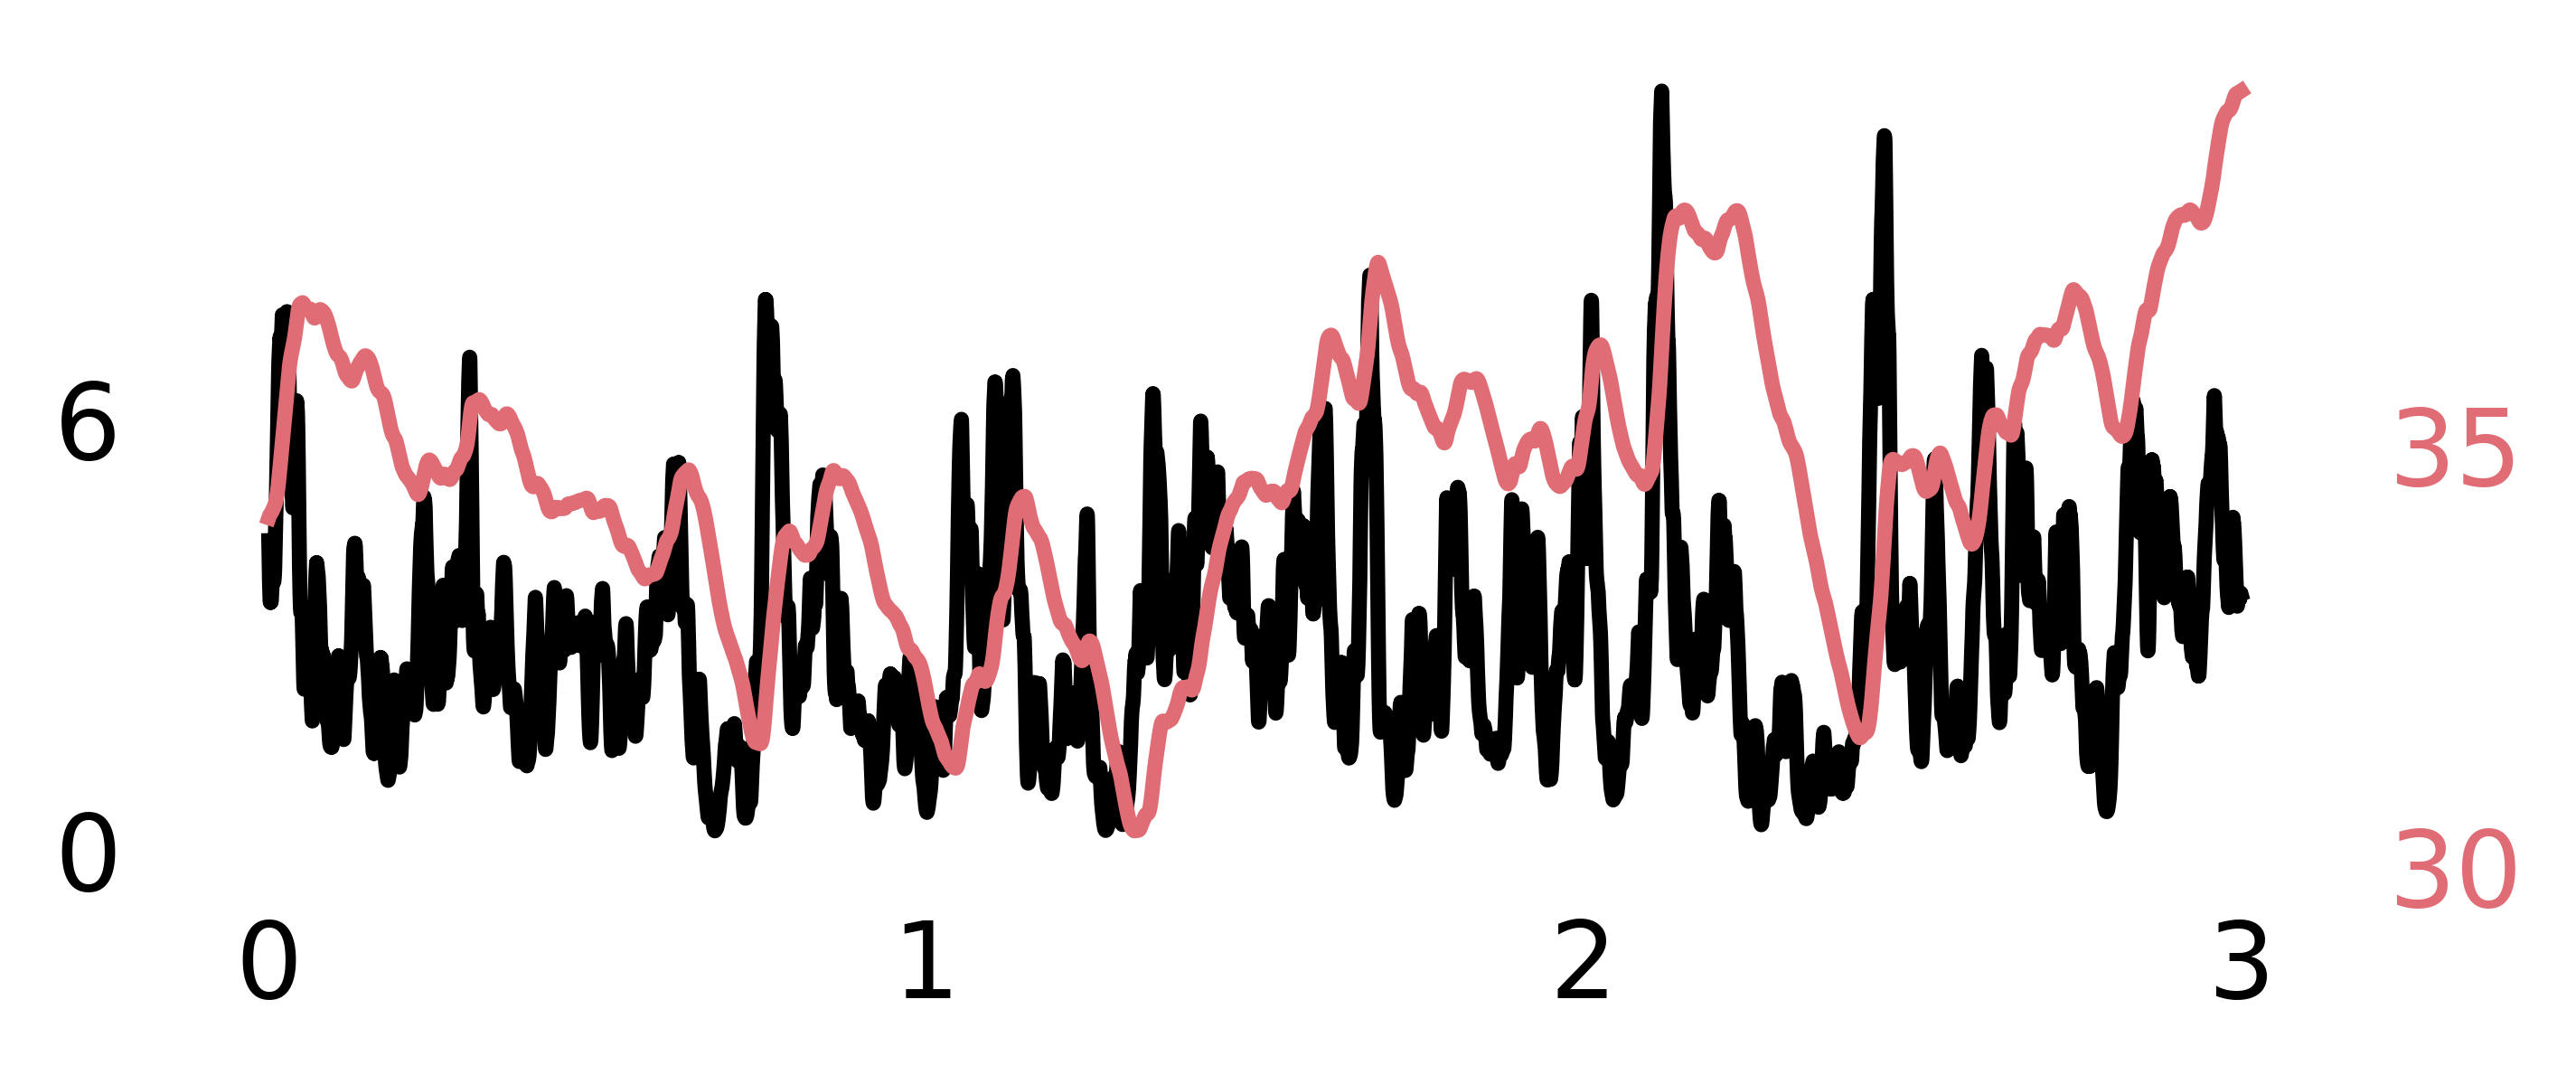

In [30]:
bp.plot_ts(model, xlim=(00000, 30000), adaptation=True, lw=2, plot_nodes="mean")

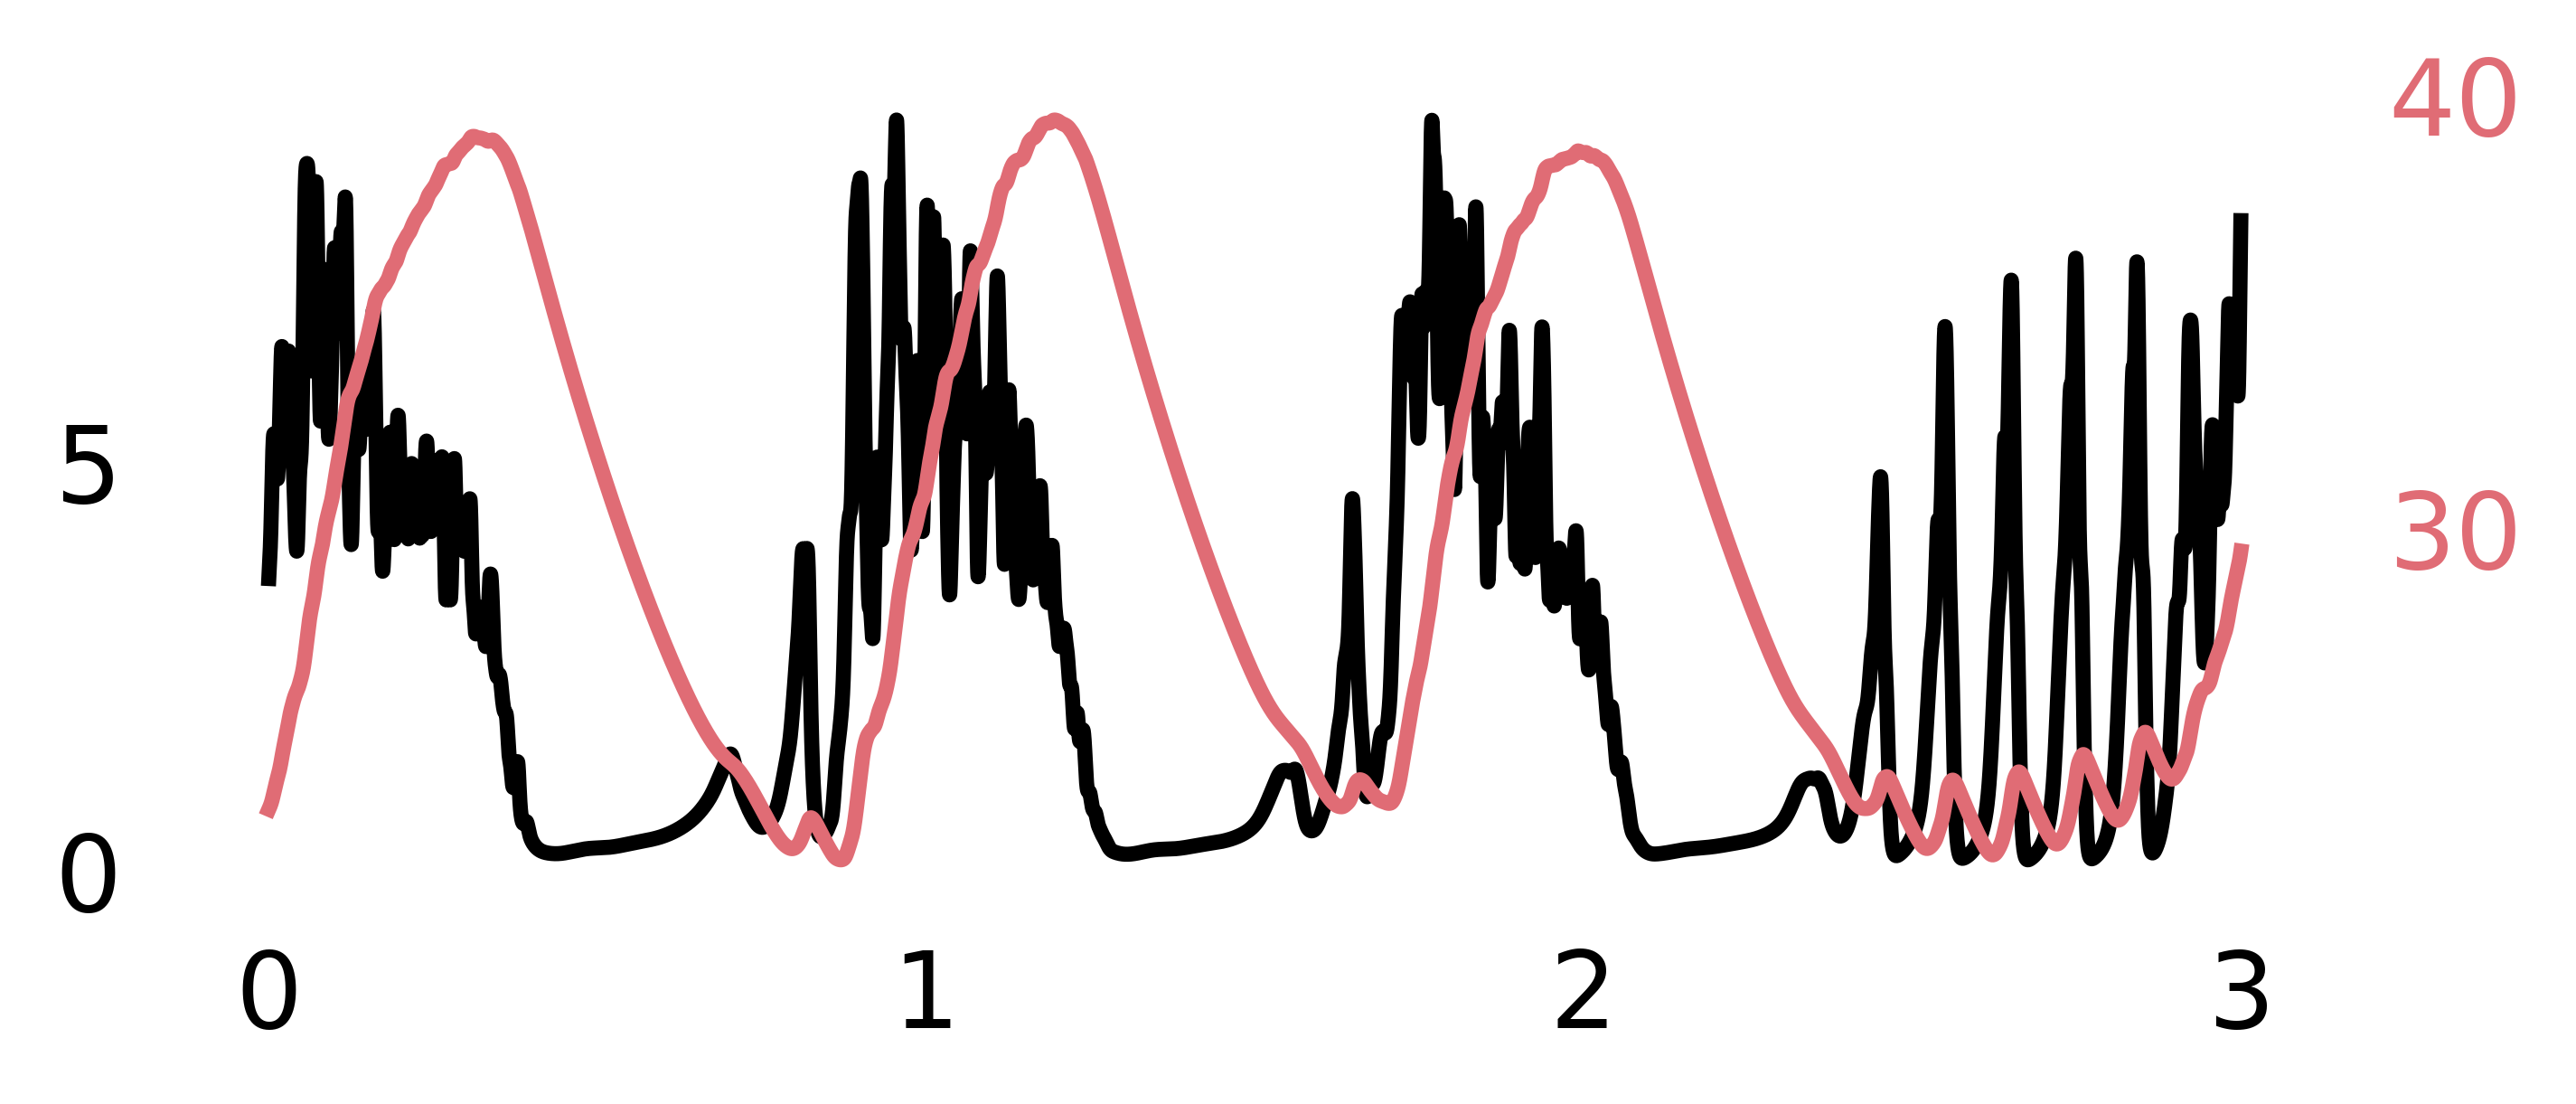

In [51]:
bp.plot_ts(model, xlim=(00000, 30000), adaptation=True, lw=2, plot_nodes="mean", savename='LC_ei_adaptation_mean.pdf')

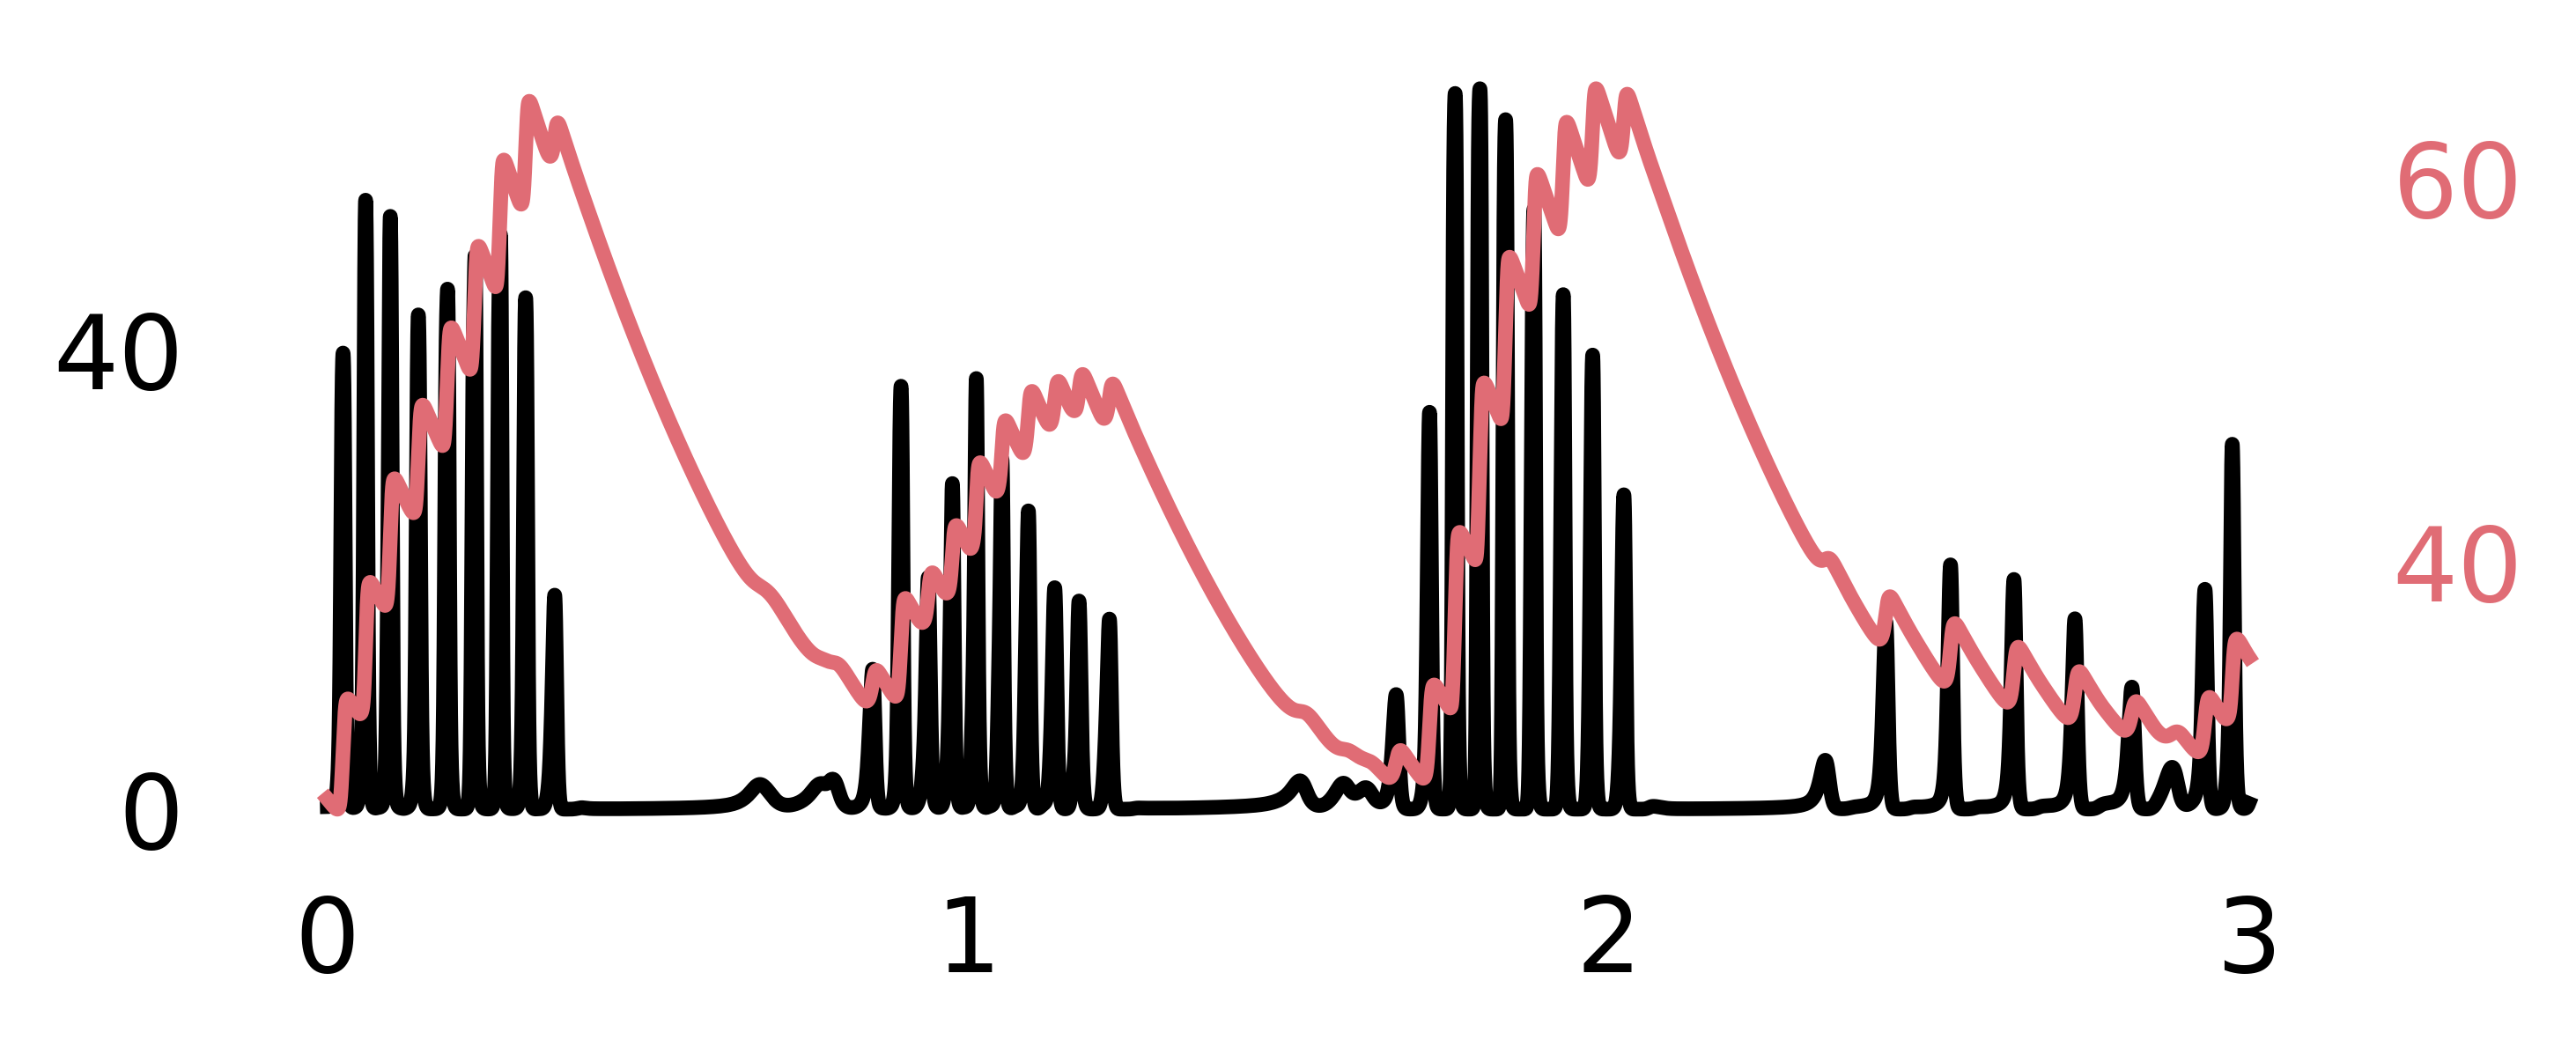

In [50]:
bp.plot_ts(model, xlim=(00000, 30000), adaptation=True, lw=2, savename='LC_ei_adaptation.pdf')

In [41]:
model.params["b"] = 20.0
model.randomICs()
model.params["sigma_ou"] = 0.1
model.params['mue_ext_mean'] = 2.5
model.params['mui_ext_mean'] = 2.0
model.run(chunkwise=True, chunksize=50000)

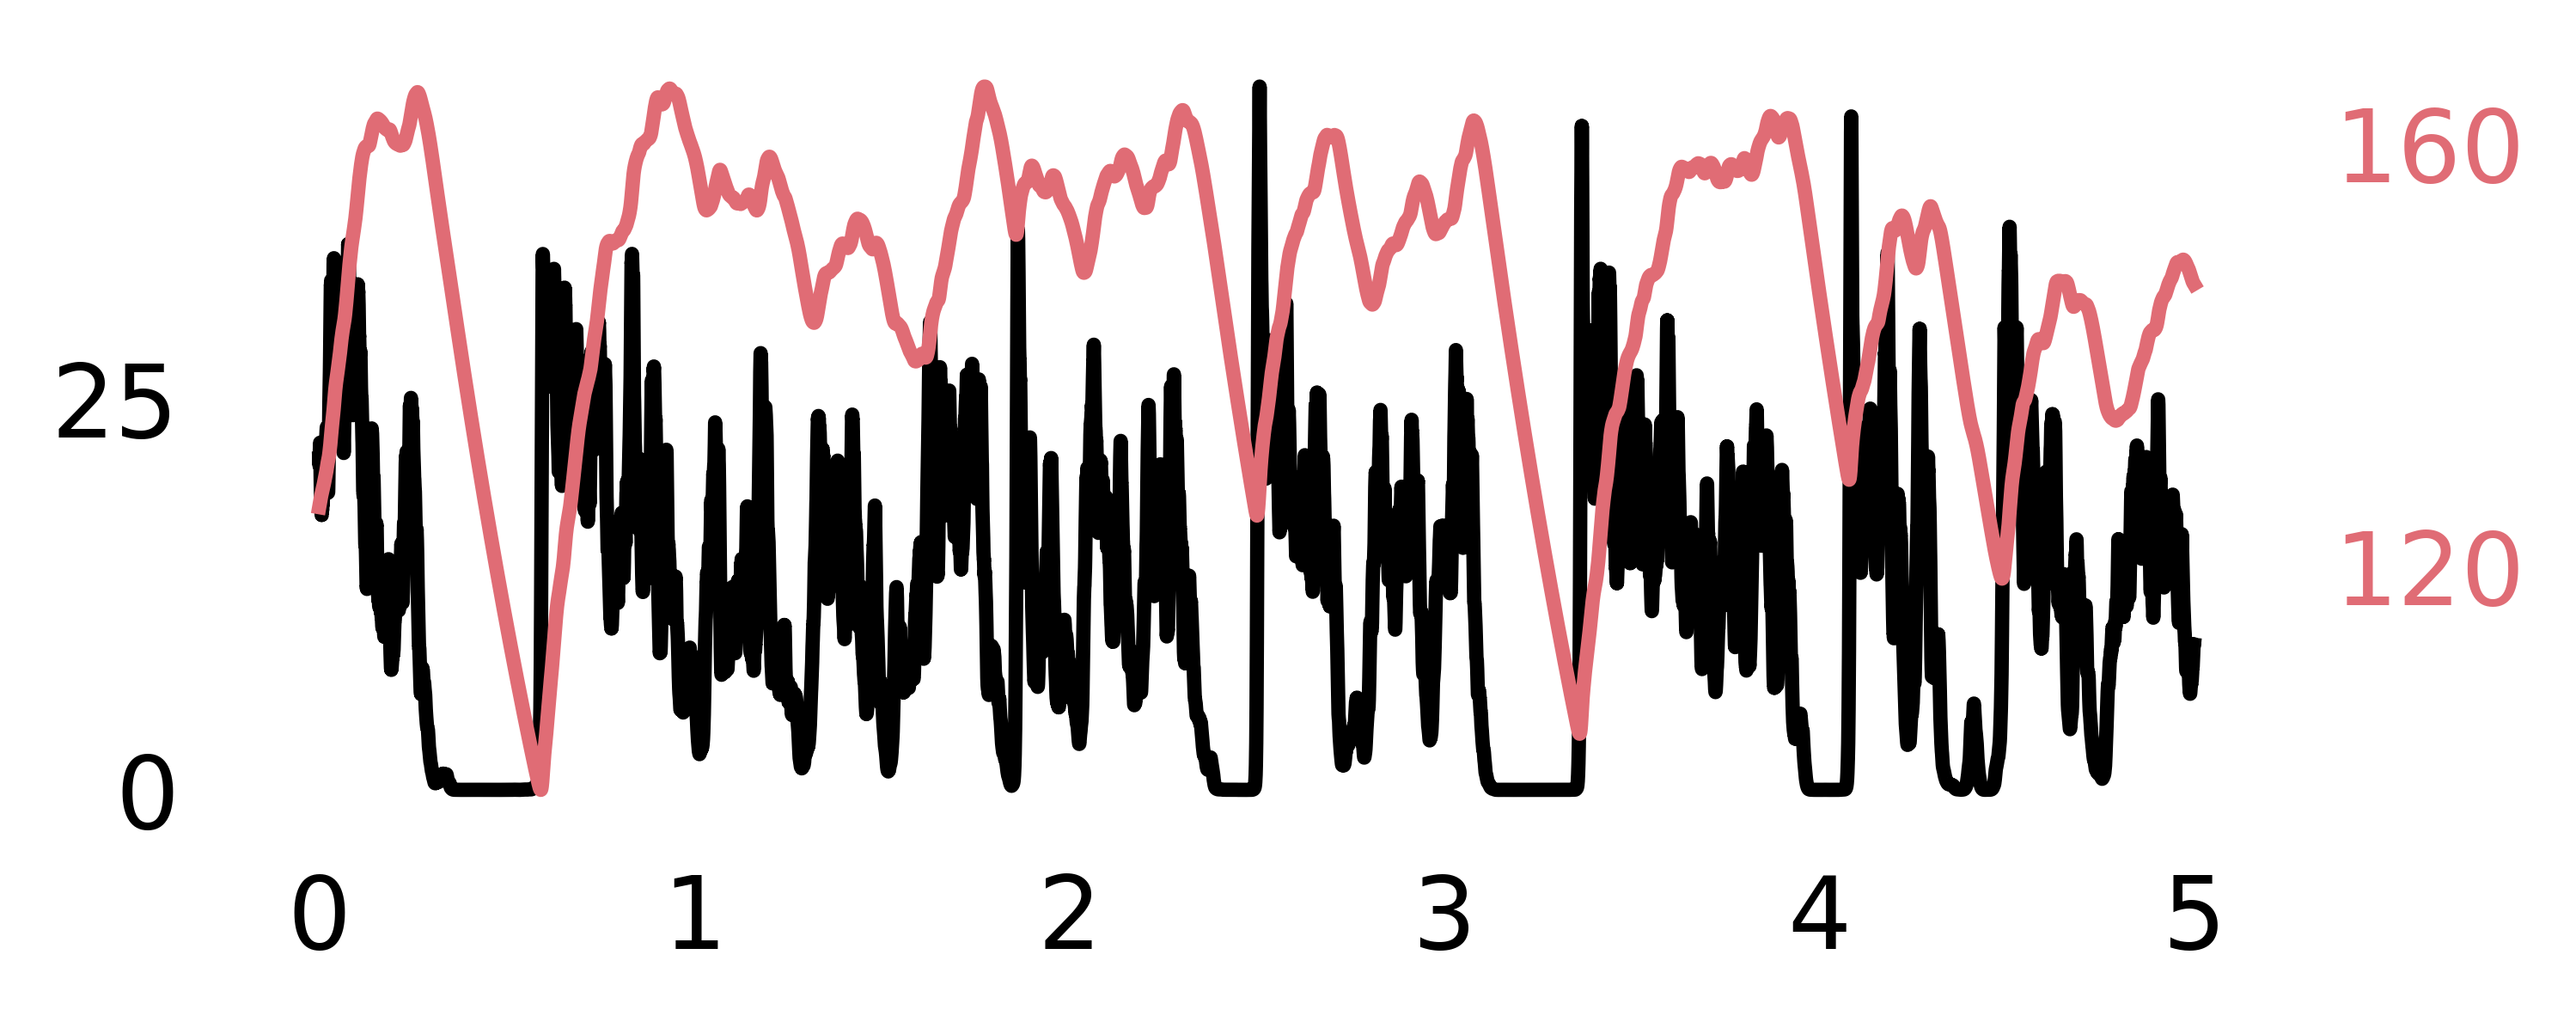

In [45]:
bp.plot_ts(model, xlim=(00000, 50000), adaptation=True, lw=2)

In [ ]:
model.randomICs()
model.params["sigma_ou"] = 0.0
model.params['mue_ext_mean'] = 2.5
model.params['mui_ext_mean'] = 2.0
model.run(chunkwise=True, chunksize=50000)

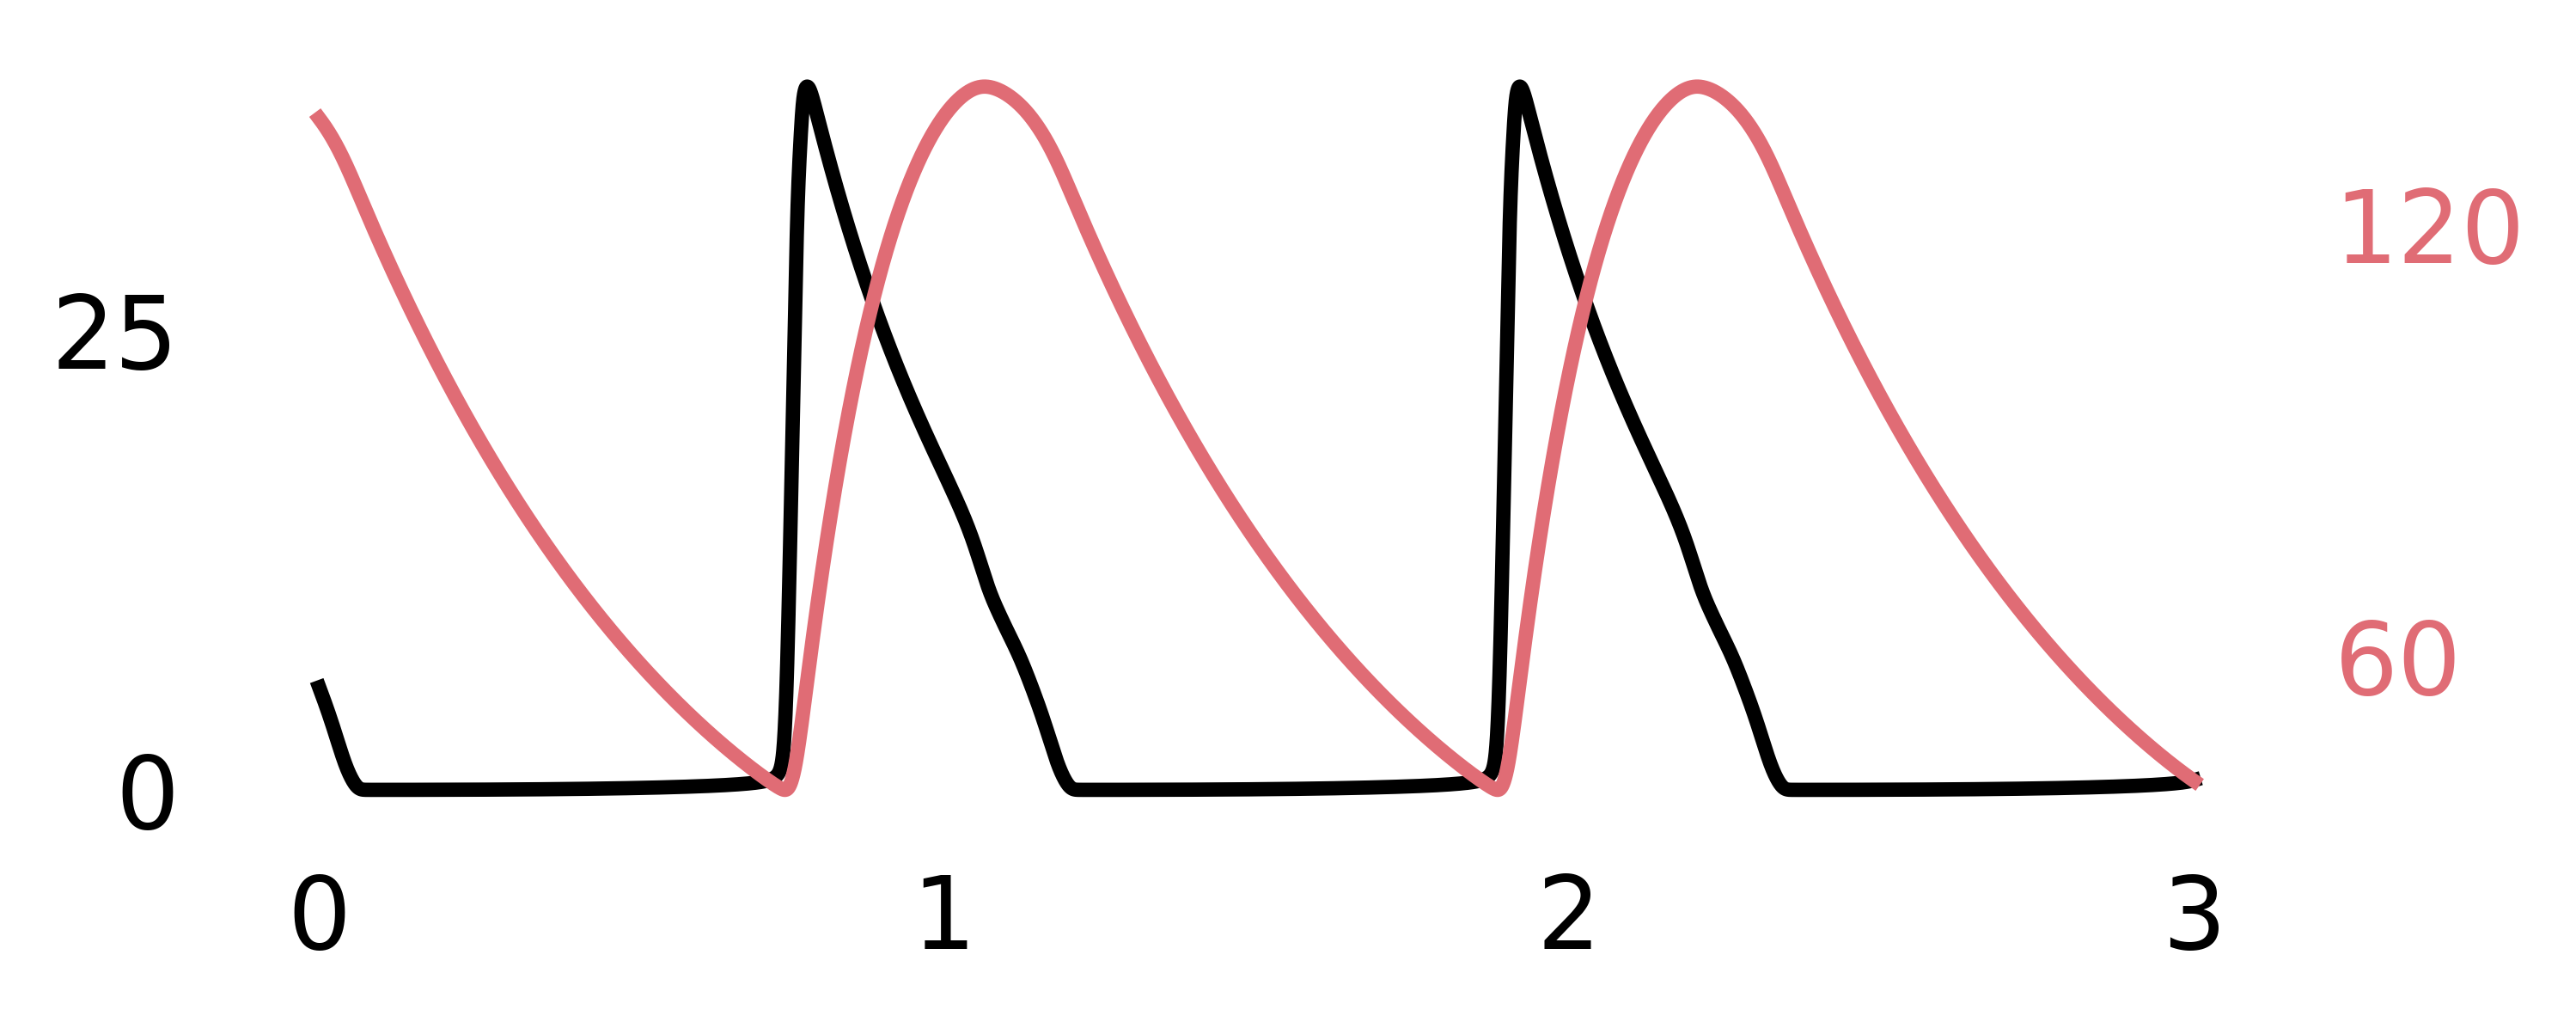

In [56]:
bp.plot_ts(model, xlim=(00000, 30000), adaptation=True, lw=2, plot_nodes="mean", savename='LC_ae_mean.pdf')

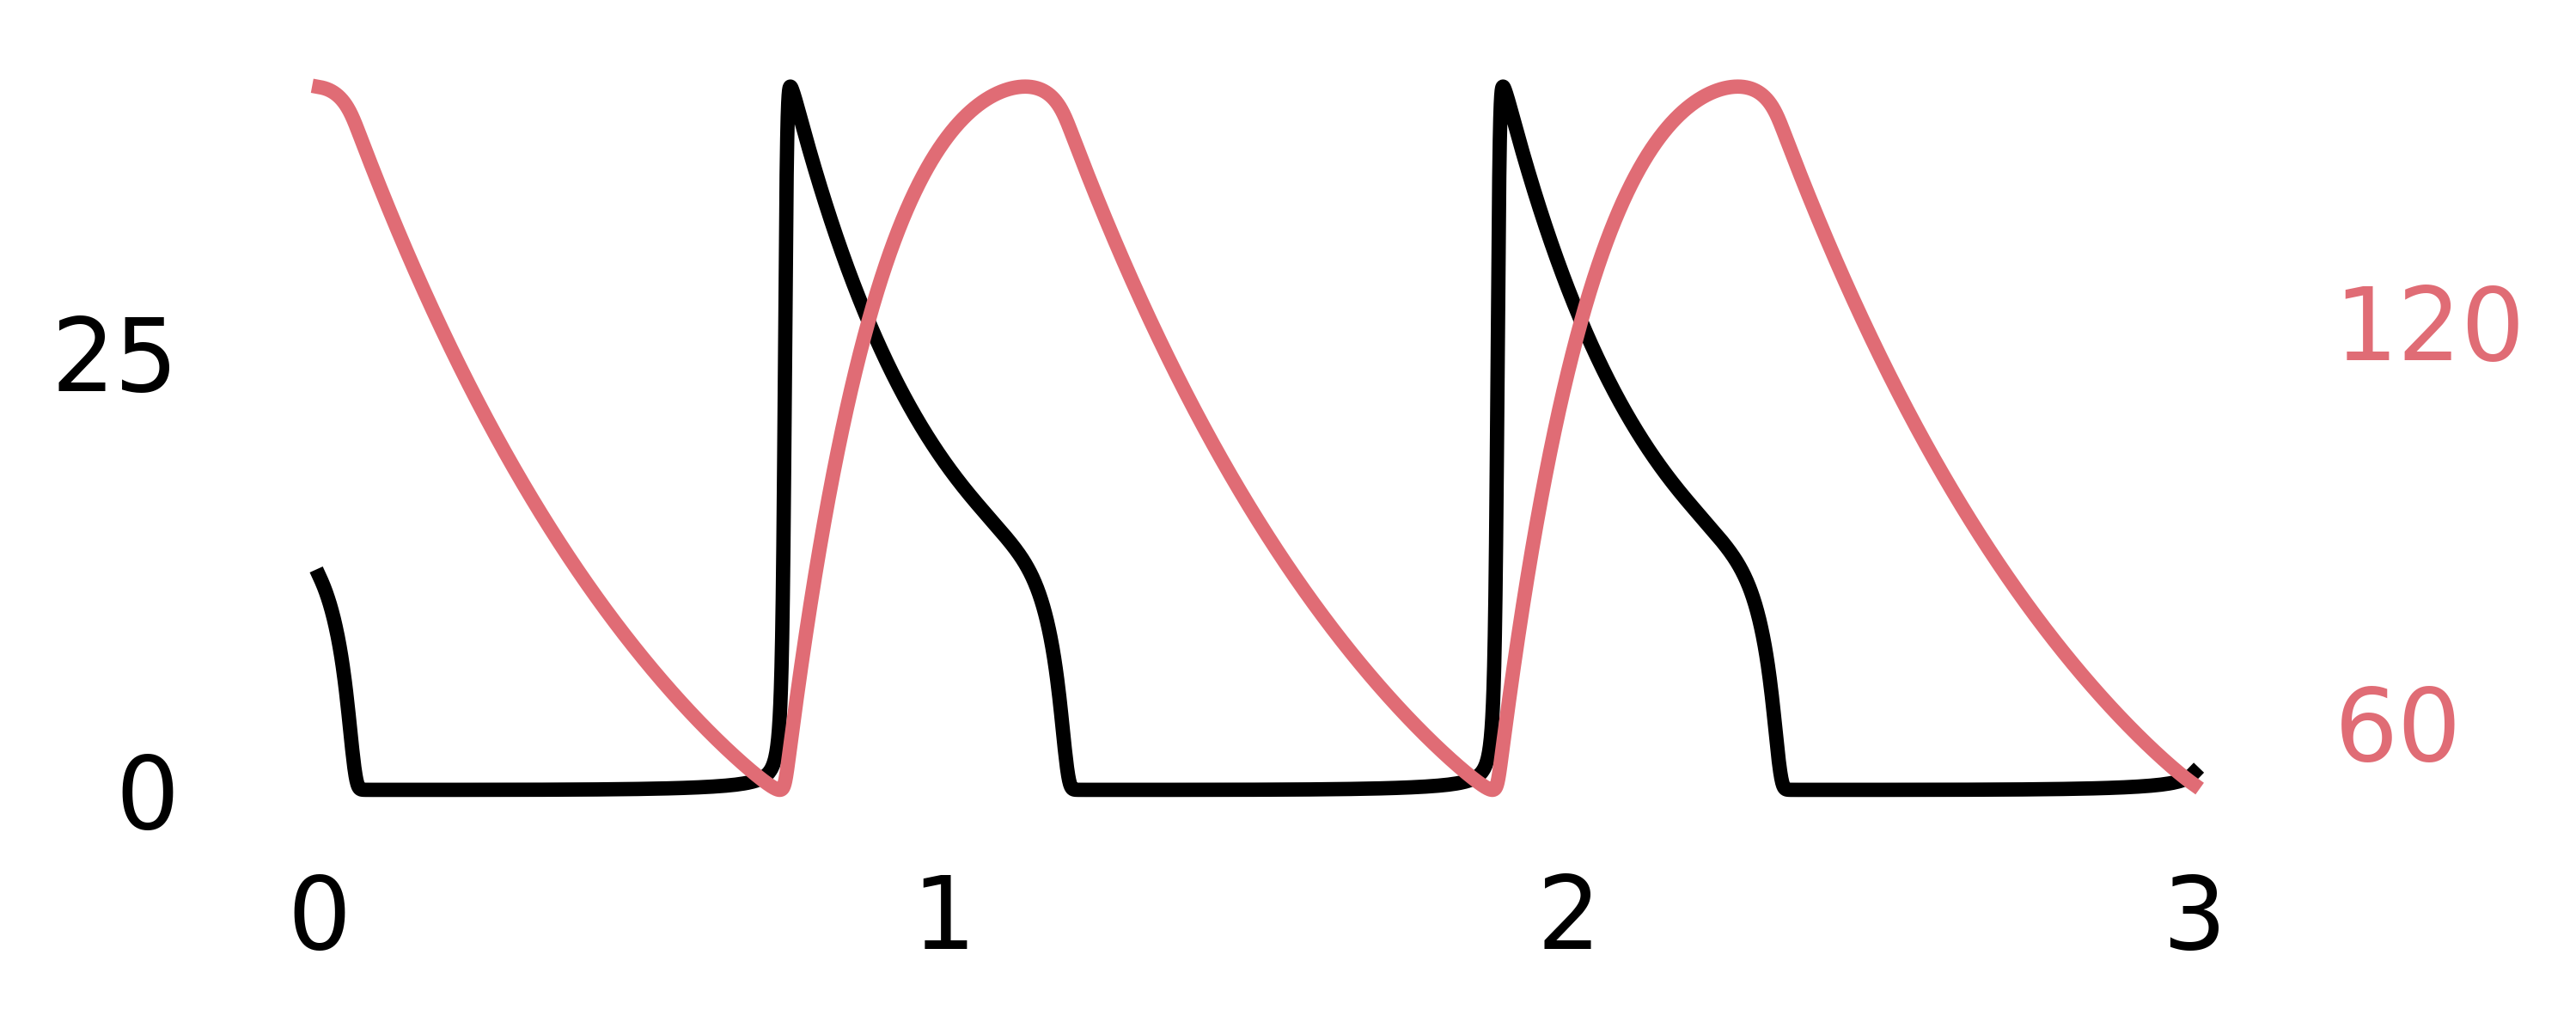

In [57]:
bp.plot_ts(model, xlim=(00000, 30000), adaptation=True, lw=2, savename='LC_ae.pdf')

## noise

In [80]:
model.params["sigma_ou"] = 0.2
model.params["b"] = 20.0

In [83]:
model.randomICs()
model.params['mue_ext_mean'] = 2.8
model.params['mui_ext_mean'] = 3.0
model.run()

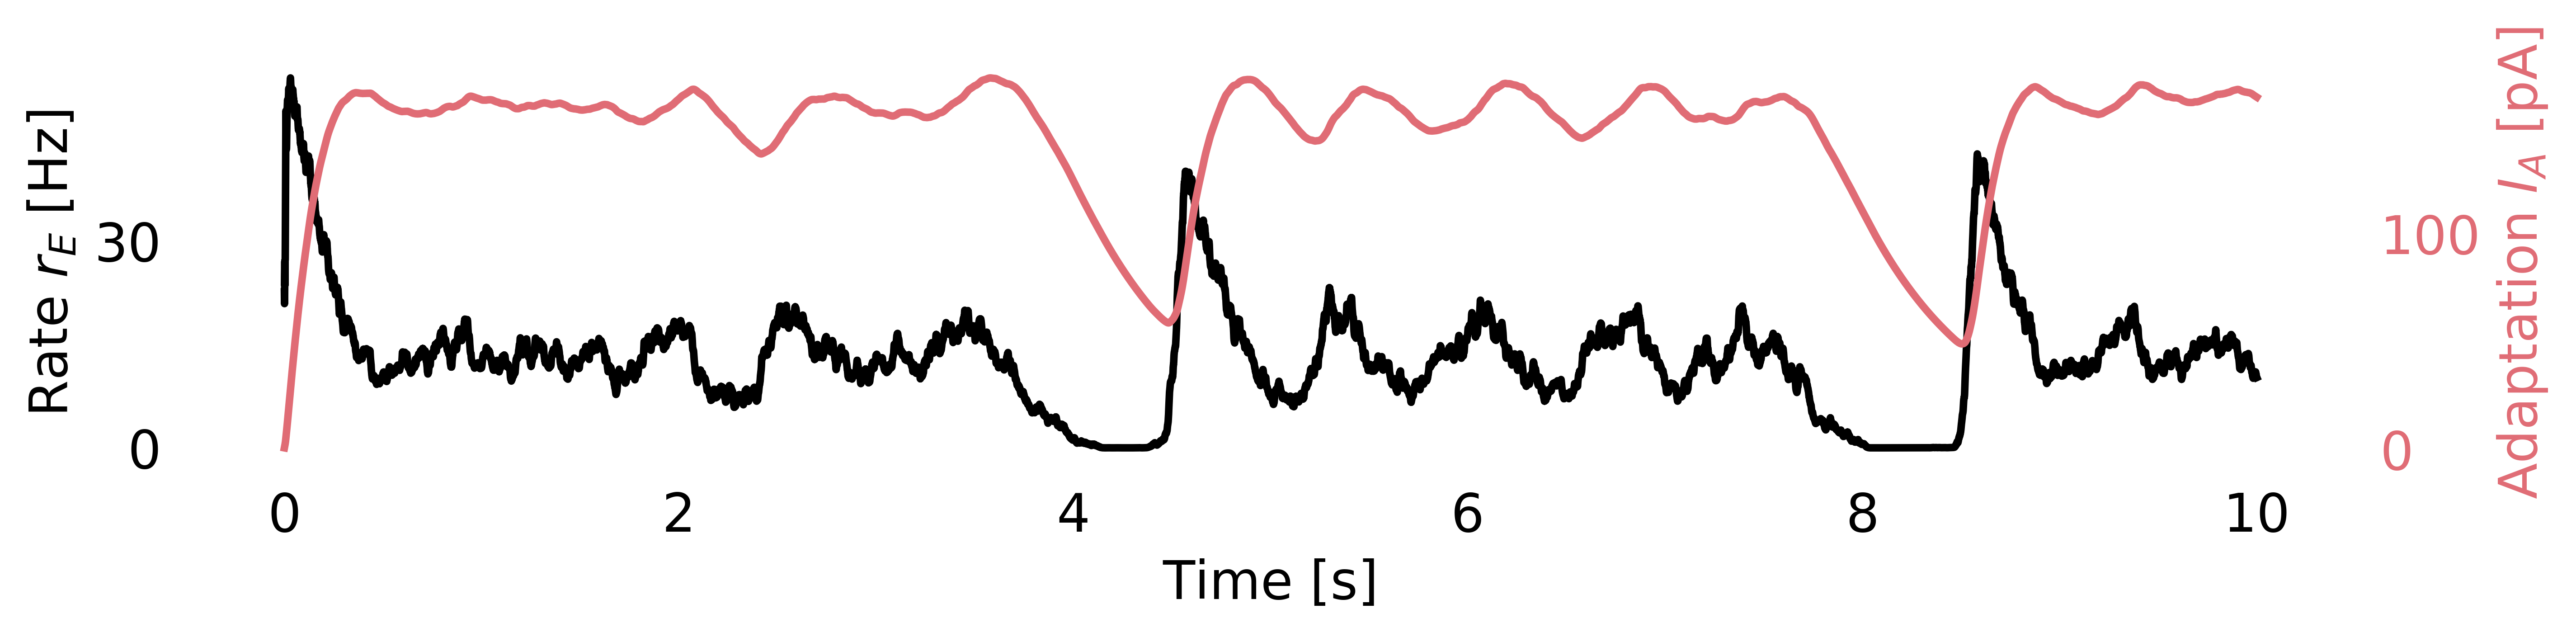

In [65]:
bp.plot_ts(model, adaptation=True, figsize=(8, 1.5), lw=2.0, labels=True, plot_nodes='mean', savename='up_down_mean.pdf')

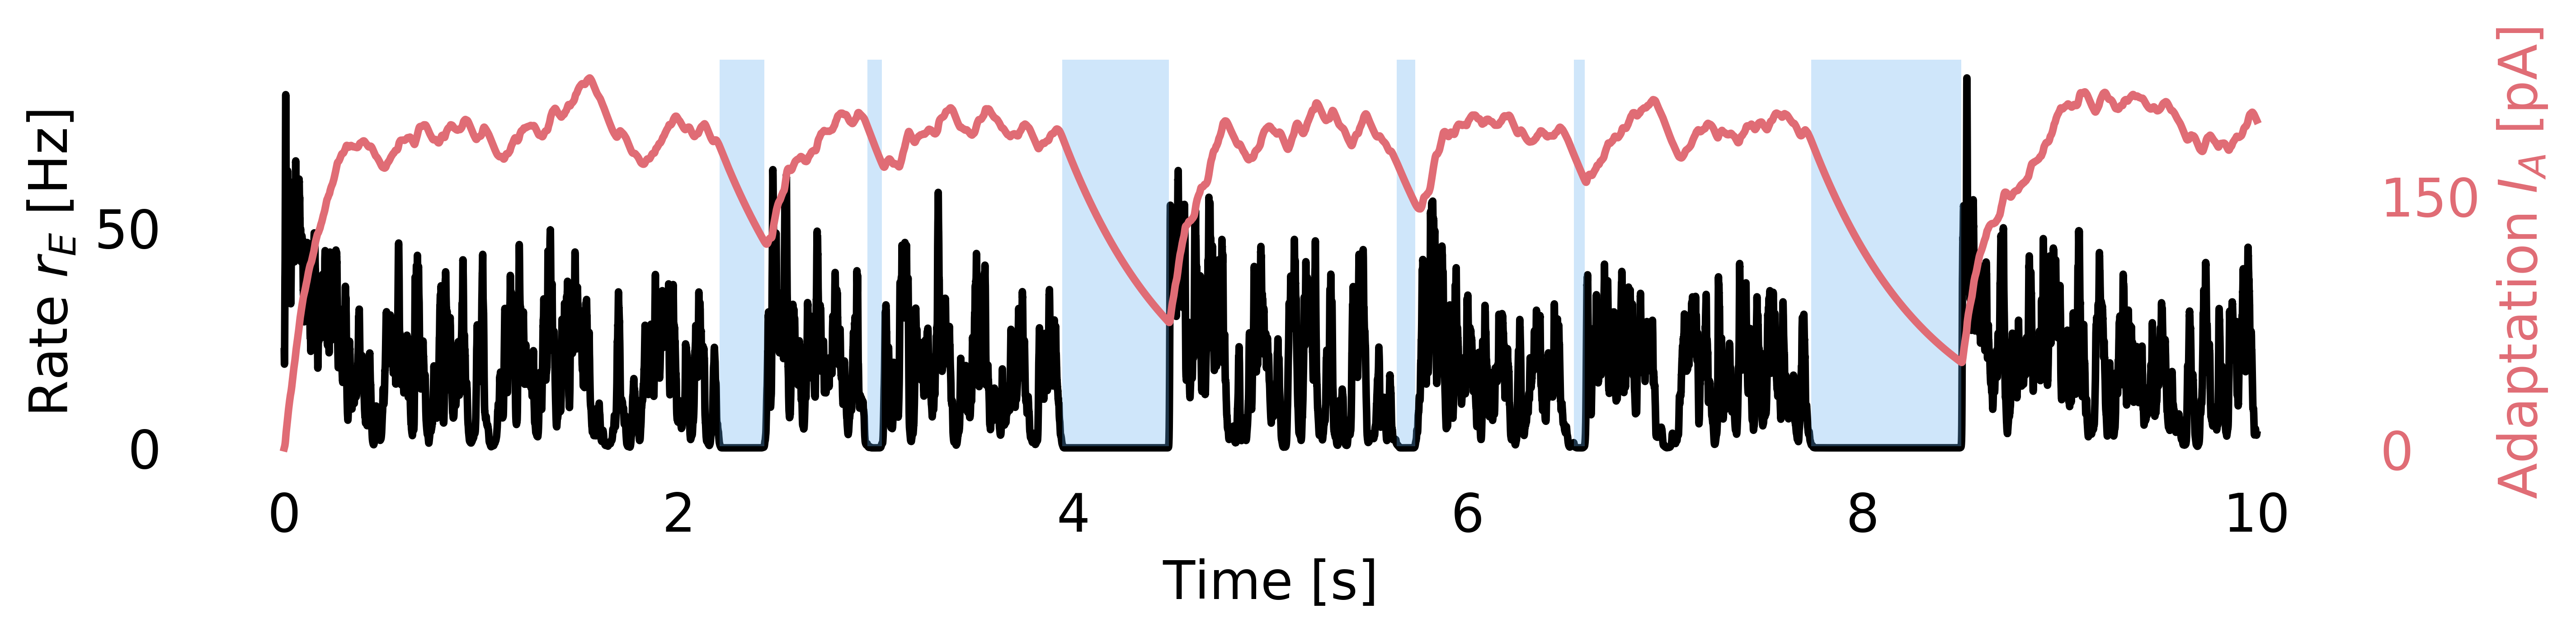

In [66]:
bp.plot_ts(model, adaptation=True, figsize=(8, 1.5), lw=2.0, labels=True)
states = bp.detectSWs(model, filter_long=True)
durations = bp.get_state_lengths(states)
down_transitions = np.diff(states) < 0
t_down_transitions = np.where(down_transitions[0])[0]
down_duraitons = [d[1] for d in durations[0] if d[0] == 0.0]
for i, t in enumerate(t_down_transitions):
    plt.axvspan(t/1000*model.params.dt, (t + down_duraitons[i])/1000*model.params.dt, ymin=0.05, ymax = 1.0, color='C1', linewidth=0, alpha=0.3, zorder=-2)
savename = 'up_down.pdf'
plt.savefig(os.path.join(paths.FIGURES_DIR, f"{savename}"))        

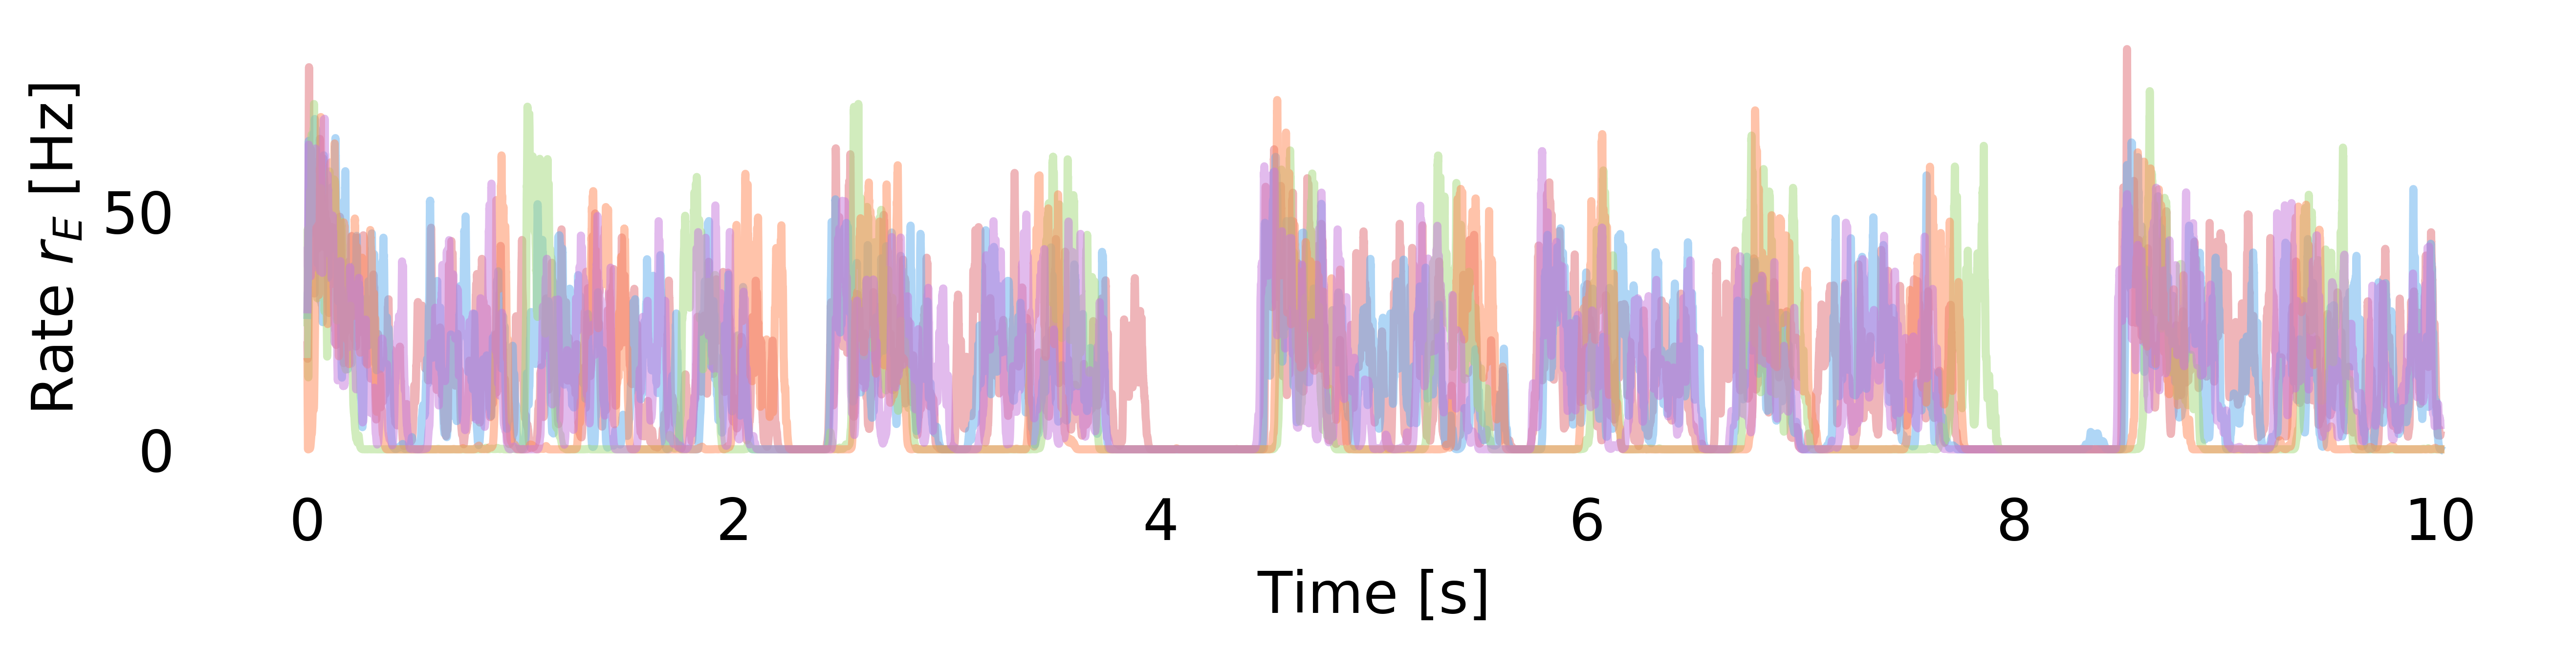

In [93]:
bp.plot_ts(model, figsize=(8, 1.5), lw=2.0, labels=True, plot_nodes=range(0, model.params.N//2, 8), plot_alpha=0.5)

In [68]:
model.params["sigma_ou"] = 0.2
model.params["b"] = 20.0
model.params['duration'] = 10 * 1000 #ms


model.randomICs()
model.params['mue_ext_mean'] = 2.2
model.params['mui_ext_mean'] = 2.5
model.run()

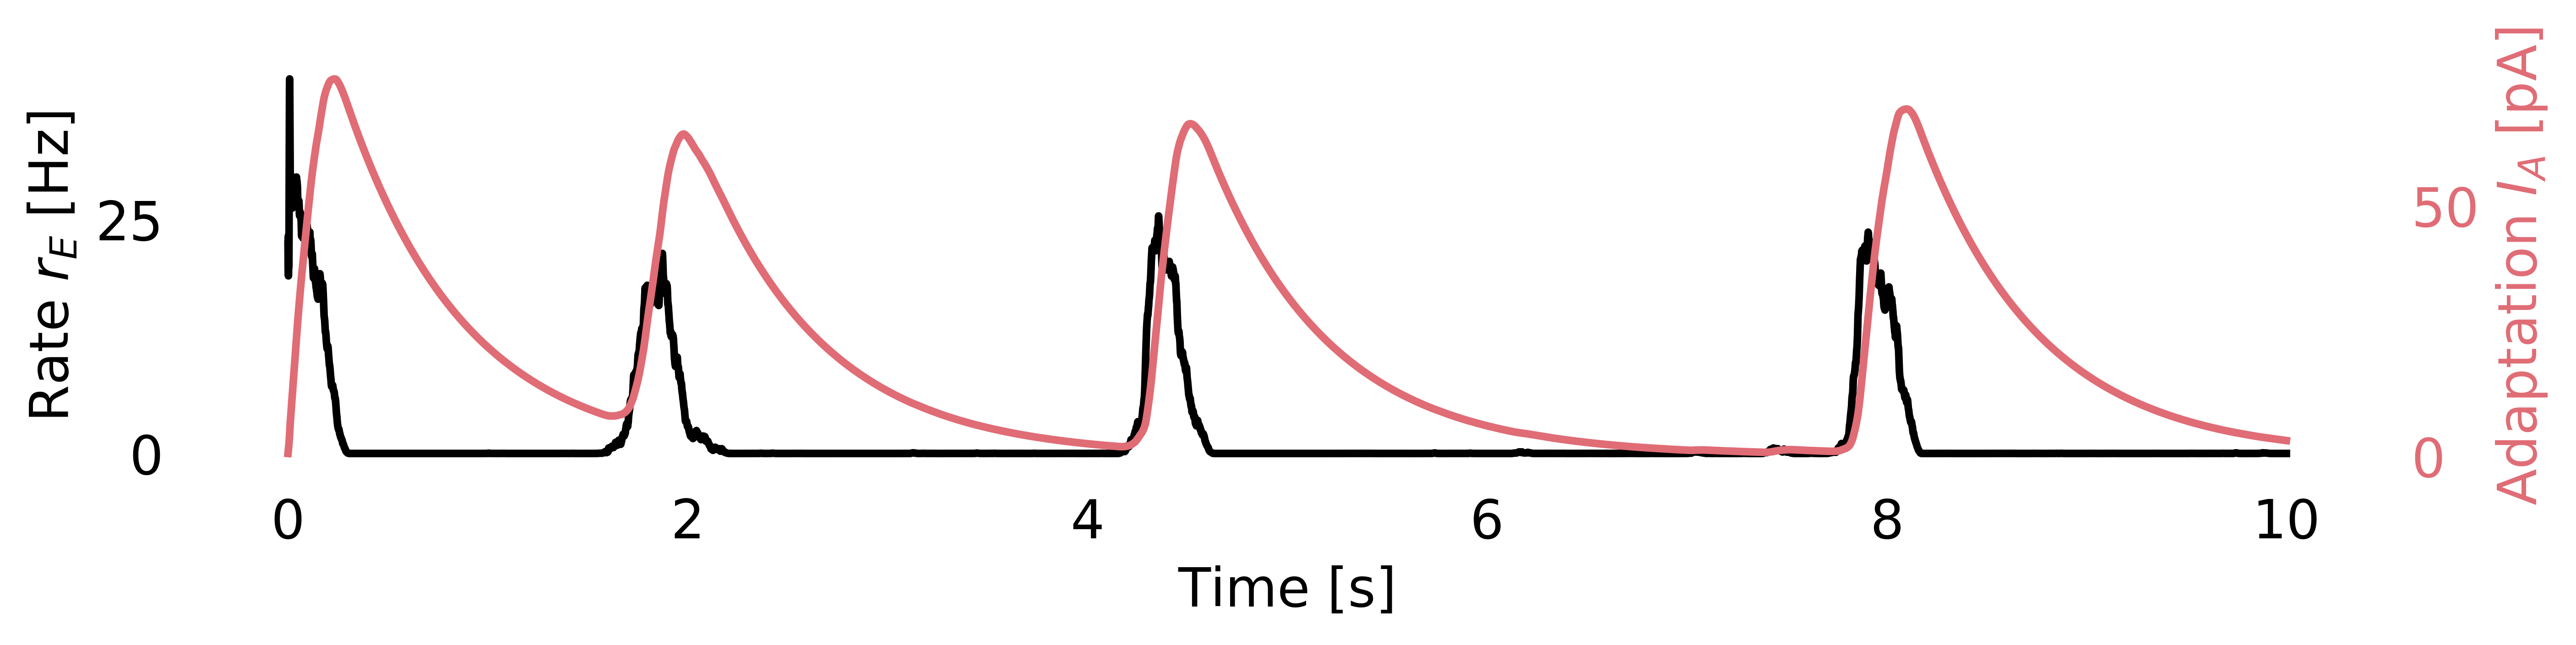

In [69]:
bp.plot_ts(model, adaptation=True, figsize=(8, 1.5), lw=2.0, labels=True, plot_nodes='mean', savename = 'down_up_mean.pdf')

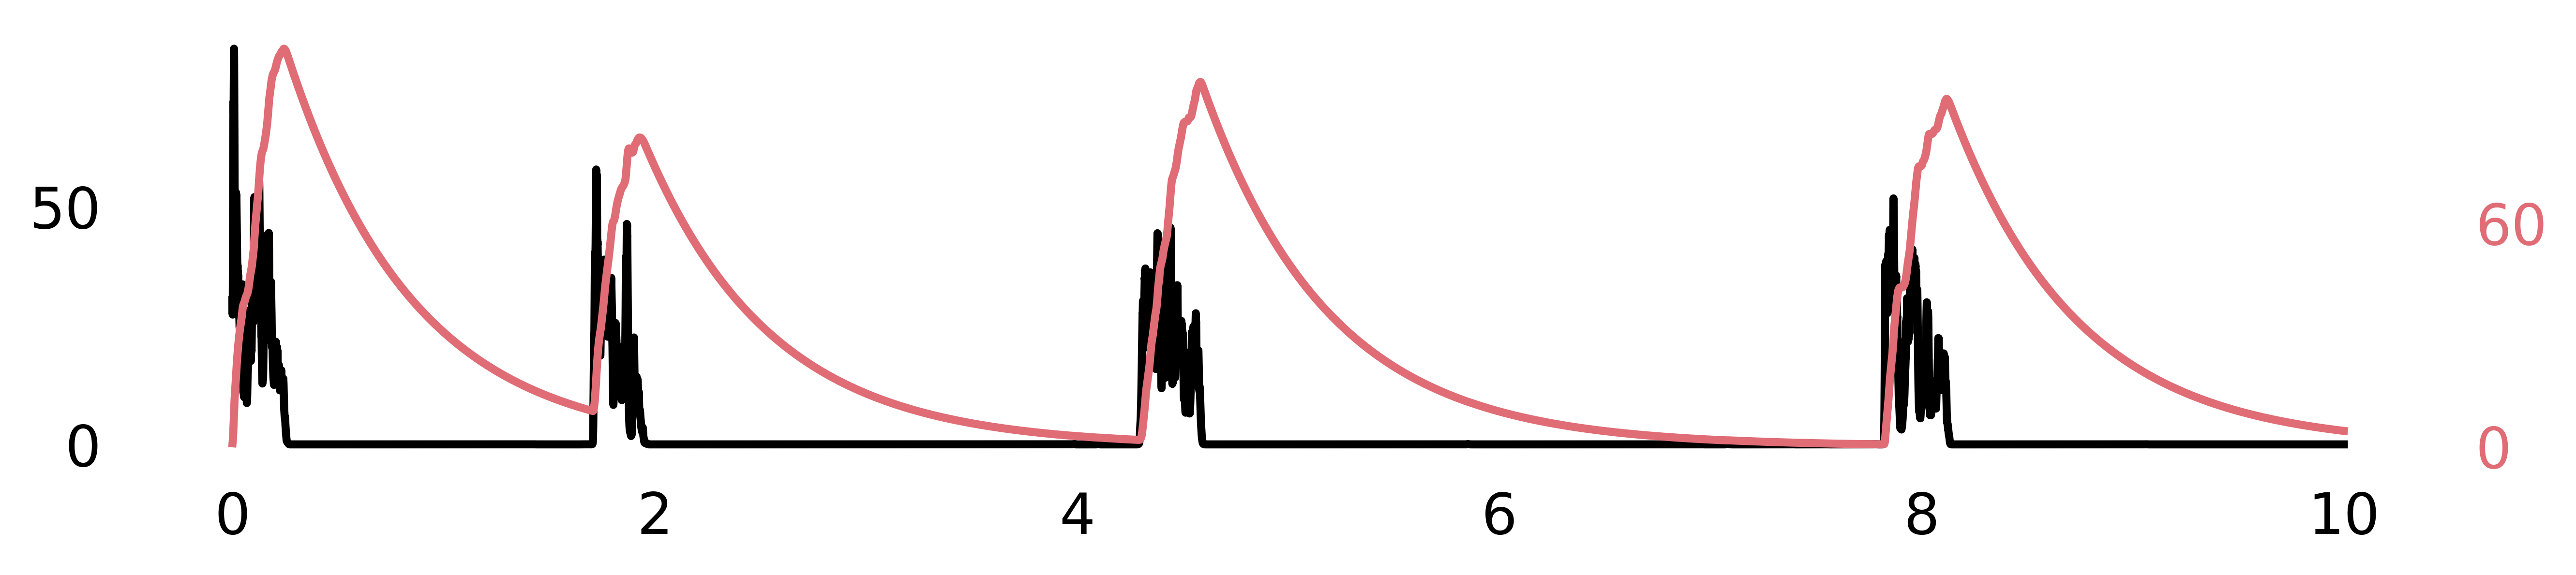

In [70]:
bp.plot_ts(model, adaptation=True, figsize=(8, 1.5), labels=False, lw=2, savename = 'down_up.pdf')